# 1. Importing Required Libraries
In this section, I am importing libraries which will define how my dataset have been selected, modelled and visualised. They are as follows:
**- Pandas:** For data framing and manipulation
**- Numpy:** Used for numerical computing
**- Matplotlib:** For plotting graphs
**- Sklearn:** For using machine learning model libraries.
    

In [2]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# 2. Loading Datasets and Exploration
In this section, I am going to load all the datasets to have a feel of what is actually inside it. To do this, I am using pandas to load it inside the dataframe for data manipulation. Additionally, I am also going to explore each dataset to produce suitable filtered data to see what can I make of it. This step is required as it seems the data provided is not optimal to be used. Hence, the following processes are executed in each of these datasets.
**-** Exploring pathways in the dataset, what features can be extracted, what can be done in accordance to the assignment criteria.
**-** Find any missing values, duplicates and null which can then be sorted out by dropping those elements.
**-** Using general stats such as mean, total, average etc. to group one or more rows for data's that feel like similar.

## 2.1 Consumer Prices Data
The following steps are performed
**-** Display the data
**-** Describe the data
**-** Print Data Types
**-** Checking for Null Values, Duplicates
**-** Filtering Data by Dropping the columns from previous checks


In [3]:
# Loading the datatset
consumer_prices_df = pd.read_csv("content/Consumer prices indicators - FAOSTAT_data_en_2-22-2024.csv", low_memory=False)

In [4]:
# Displaying the first few rows of the consumer prices data
consumer_prices_df.head()

,Domain Code,Domain,Area Code (M49),Area,Year Code,Year,Item Code,Item,Months Code,Months,Element Code,Element,Unit,Value,Flag,Flag Description,Note
0,CP,Consumer Price Indices,4,Afghanistan,2000,2000,23013,"Consumer Prices, Food Indices (2015 = 100)",7001,January,6125,Value,NaN,24.356332,I,Imputed value,base year is 2015
1,CP,Consumer Price Indices,4,Afghanistan,2000,2000,23013,"Consumer Prices, Food Indices (2015 = 100)",7002,February,6125,Value,NaN,23.636242,I,Imputed value,base year is 2015
2,CP,Consumer Price Indices,4,Afghanistan,2000,2000,23013,"Consumer Prices, Food Indices (2015 = 100)",7003,March,6125,Value,NaN,23.485345,I,Imputed value,base year is 2015
3,CP,Consumer Price Indices,4,Afghanistan,2000,2000,23013,"Consumer Prices, Food Indices (2015 = 100)",7004,April,6125,Value,NaN,24.767194,I,Imputed value,base year is 2015
4,CP,Consumer Price Indices,4,Afghanistan,2000,2000,23013,"Consumer Prices, Food Indices (2015 = 100)",7005,May,6125,Value,NaN,25.956912,I,Imputed value,base year is 2015


In [5]:
# Describing the consumer prices data
consumer_prices_df.describe()

,Area Code (M49),Year Code,Year,Item Code,Months Code,Element Code,Value
count,112890.000000,112890.000000,112890.000000,112890.000000,112890.000000,112890.000000,1.128900e+05
mean,424.738719,2011.649588,2011.649588,23013.489211,7006.451448,6123.043157,2.059421e+08
std,249.672423,6.716990,6.716990,0.499886,3.437632,1.999543,1.683090e+10
min,4.000000,2000.000000,2000.000000,23013.000000,7001.000000,6121.000000,-2.498299e+01
25%,212.000000,2006.000000,2006.000000,23013.000000,7003.000000,6121.000000,4.245692e+00
50%,426.000000,2012.000000,2012.000000,23013.000000,7006.000000,6125.000000,3.087651e+01
75%,638.000000,2017.000000,2017.000000,23014.000000,7009.000000,6125.000000,9.252795e+01
max,894.000000,2023.000000,2023.000000,23014.000000,7012.000000,6125.000000,2.235770e+12


In [6]:
# Printing information about the consumer price data
consumer_prices_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112890 entries, 0 to 112889
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Domain Code       112890 non-null  object 
 1   Domain            112890 non-null  object 
 2   Area Code (M49)   112890 non-null  int64  
 3   Area              112890 non-null  object 
 4   Year Code         112890 non-null  int64  
 5   Year              112890 non-null  int64  
 6   Item Code         112890 non-null  int64  
 7   Item              112890 non-null  object 
 8   Months Code       112890 non-null  int64  
 9   Months            112890 non-null  object 
 10  Element Code      112890 non-null  int64  
 11  Element           112890 non-null  object 
 12  Unit              55227 non-null   object 
 13  Value             112890 non-null  float64
 14  Flag              112890 non-null  object 
 15  Flag Description  112890 non-null  object 
 16  Note              57

In [7]:
# Filtering data to only take food price inflation and from after the year 2010
consumer_prices_df = consumer_prices_df[(consumer_prices_df['Year'] >= 2000) & consumer_prices_df['Item'].str.contains('Food price inflation')]

# Dropping not required columns
consumer_prices_df = consumer_prices_df.drop(columns=['Domain Code', 'Domain', 'Year Code', 'Item', 'Item Code','Months', 'Element Code', 'Element', 'Unit', 'Flag', 'Flag Description', 'Months Code', 'Area Code (M49)', 'Note'])

consumer_prices_df = consumer_prices_df.groupby(["Area", "Year"])["Value"].mean().reset_index()

# Renaming the column to avoid confusion of value tables after merging.
consumer_prices_df = consumer_prices_df.rename(columns={'Value': 'Total Food Price Inflation'})

In [8]:
# Checking for NaN values
consumer_prices_df.isnull().sum()

Area                          0
Year                          0
Total Food Price Inflation    0
dtype: int64

In [9]:
# Check for duplicates
duplicates_found = consumer_prices_df.duplicated().sum()

# If duplicates are found, remove them
if duplicates_found > 0:
    consumer_prices_df.drop_duplicates(inplace=True)
    print("Duplicates removed.")
else:
    print("No duplicates found.")

No duplicates found.


In [10]:
consumer_prices_df.head(100)

,Area,Year,Total Food Price Inflation
0,Afghanistan,2001,12.780692
1,Afghanistan,2002,18.254516
2,Afghanistan,2003,14.102244
3,Afghanistan,2004,14.072172
4,Afghanistan,2005,12.606240
...,...,...,...
95,Angola,2004,51.533639
96,Angola,2005,23.399672
97,Angola,2006,17.286257
98,Angola,2007,14.186884


## 2.2 Crops Production Data
The following steps are performed
**-** Display the data
**-** Describe the data
**-** Print Data Types
**-** Checking for Null Values, Duplicates
**-** Filtering Data by Dropping the columns from previous checks

In [11]:
# load the dataset
crops_prod_df = pd.read_csv("content/Crops production indicators - FAOSTAT_data_en_2-22-2024.csv", low_memory=False)

# Display the first few rows of the crops prod use data
crops_prod_df.head()

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code (CPC),Item,Year Code,Year,Unit,Value,Flag,Flag Description,Note
0,QCL,Crops and livestock products,4,Afghanistan,5419,Yield,F1717,"Cereals, primary",2000,2000,100 g/ha,8063,A,Official figure,NaN
1,QCL,Crops and livestock products,4,Afghanistan,5419,Yield,F1717,"Cereals, primary",2001,2001,100 g/ha,10067,A,Official figure,NaN
2,QCL,Crops and livestock products,4,Afghanistan,5419,Yield,F1717,"Cereals, primary",2002,2002,100 g/ha,16698,A,Official figure,NaN
3,QCL,Crops and livestock products,4,Afghanistan,5419,Yield,F1717,"Cereals, primary",2003,2003,100 g/ha,14580,A,Official figure,NaN
4,QCL,Crops and livestock products,4,Afghanistan,5419,Yield,F1717,"Cereals, primary",2004,2004,100 g/ha,13348,A,Official figure,NaN


In [12]:
# Describe the crops prod data
crops_prod_df.describe()

,Area Code (M49),Element Code,Year Code,Year,Value,Note
count,41649.000000,41649.0,41649.000000,41649.000000,4.164900e+04,0.0
mean,425.491777,5419.0,2010.900478,2010.900478,1.056544e+05,NaN
std,255.597188,0.0,6.614270,6.614270,1.688875e+05,NaN
min,4.000000,5419.0,2000.000000,2000.000000,0.000000e+00,NaN
25%,203.000000,5419.0,2005.000000,2005.000000,8.469000e+03,NaN
50%,417.000000,5419.0,2011.000000,2011.000000,3.828200e+04,NaN
75%,643.000000,5419.0,2017.000000,2017.000000,1.289290e+05,NaN
max,894.000000,5419.0,2022.000000,2022.000000,1.359231e+06,NaN


In [13]:
# Print information about the crops prod use data
crops_prod_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41649 entries, 0 to 41648
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Domain Code       41649 non-null  object 
 1   Domain            41649 non-null  object 
 2   Area Code (M49)   41649 non-null  int64  
 3   Area              41649 non-null  object 
 4   Element Code      41649 non-null  int64  
 5   Element           41649 non-null  object 
 6   Item Code (CPC)   41649 non-null  object 
 7   Item              41649 non-null  object 
 8   Year Code         41649 non-null  int64  
 9   Year              41649 non-null  int64  
 10  Unit              41649 non-null  object 
 11  Value             41649 non-null  int64  
 12  Flag              41649 non-null  object 
 13  Flag Description  41649 non-null  object 
 14  Note              0 non-null      float64
dtypes: float64(1), int64(5), object(9)
memory usage: 4.8+ MB


In [14]:
# Filtering data to only take estimated value and from after the year 2010 to streamline data
# crops_prod_df = crops_prod_df[(crops_prod_df['Year'] >= 2000) & crops_prod_df['Flag Description'].str.contains('Estimated value')]

# Dropping not required columns
crops_prod_df = crops_prod_df.drop(columns=['Domain Code', 'Domain', 'Year Code', 'Item', 'Item Code (CPC)', 'Element Code', 'Element', 'Unit', 'Flag', 'Flag Description', 'Area Code (M49)', 'Note'])

crops_prod_df = crops_prod_df.groupby(["Area", "Year"])["Value"].sum().reset_index()

# Renaming the column to avoid confusion of value tables after merging.
crops_prod_df = crops_prod_df.rename(columns={'Value': 'Total Crops and Livestock Yielded per 100g/ha'})

In [15]:
# Checking for NaN values
crops_prod_df.isnull().sum()

Area                                             0
Year                                             0
Total Crops and Livestock Yielded per 100g/ha    0
dtype: int64

In [16]:
# Check for duplicates
duplicates_found = crops_prod_df.duplicated().sum()

# If duplicates are found, remove them
if duplicates_found > 0:
    crops_prod_df.drop_duplicates(inplace=True)
    print("Duplicates removed.")
else:
    print("No duplicates found.")

No duplicates found.


In [17]:
crops_prod_df.head(100)

,Area,Year,Total Crops and Livestock Yielded per 100g/ha
0,Afghanistan,2000,661957
1,Afghanistan,2001,667714
2,Afghanistan,2002,672489
3,Afghanistan,2003,673301
4,Afghanistan,2004,675944
...,...,...,...
95,Antigua and Barbuda,2003,235718
96,Antigua and Barbuda,2004,235815
97,Antigua and Barbuda,2005,237324
98,Antigua and Barbuda,2006,237572


In [18]:
# # Plotting
# country = 'Nepal'
# 
# country_data = crops_prod_df[crops_prod_df['Area'] == country]
# 
# plt.figure(figsize=(10, 6))  # Set the figure size
# plt.plot(country_data['Year'], country_data['Total Crops and Livestock Yielded per 100g/ha'], marker='o', linestyle='-')  # Plotting the data
# plt.title(f'Yearly Crops and Livestock Yielded in {country}')  # Setting the title
# plt.xlabel('Year')  # Setting the x-label
# plt.ylabel('Total Crops and Livestock Yielded per 100g/ha')  # Setting the y-label
# plt.grid(True)  # Showing grid
# plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
# plt.tight_layout()  # Adjust layout to prevent labels from being cut off
# plt.show()  # Show plot

## 2.3 Emissions Data
The following steps are performed
**-** Display the data
**-** Describe the data
**-** Print Data Types
**-** Checking for Null Values, Duplicates
**-** Filtering Data by Dropping the columns from previous check

In [19]:
# Load the dataset
emissions_df = pd.read_csv("content/Emissions - FAOSTAT_data_en_2-27-2024.csv", low_memory=False)

# Display the first few rows of the emissions data
emissions_df.head()

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code (CPC),Item,Year Code,Year,Source Code,Source,Unit,Value,Flag,Flag Description,Note
0,GCE,Emissions from Crops,4,Afghanistan,72430,Crops total (Emissions N2O),F1712,All Crops,2000,2000,3050,FAO TIER 1,kt,0.7056,E,Estimated value,NaN
1,GCE,Emissions from Crops,4,Afghanistan,72440,Crops total (Emissions CH4),F1712,All Crops,2000,2000,3050,FAO TIER 1,kt,20.8471,E,Estimated value,NaN
2,GCE,Emissions from Crops,4,Afghanistan,72430,Crops total (Emissions N2O),F1712,All Crops,2001,2001,3050,FAO TIER 1,kt,0.7054,E,Estimated value,NaN
3,GCE,Emissions from Crops,4,Afghanistan,72440,Crops total (Emissions CH4),F1712,All Crops,2001,2001,3050,FAO TIER 1,kt,19.2605,E,Estimated value,NaN
4,GCE,Emissions from Crops,4,Afghanistan,72430,Crops total (Emissions N2O),F1712,All Crops,2002,2002,3050,FAO TIER 1,kt,1.0656,E,Estimated value,NaN


In [20]:
# Describing the emissions data
emissions_df.describe()

,Area Code (M49),Element Code,Year Code,Year,Source Code,Value,Note
count,28910.000000,28910.000000,28910.000000,28910.000000,28910.0,28910.000000,0.0
mean,432.519543,26168.457281,2010.522414,2010.522414,3050.0,636.696462,NaN
std,252.127600,29584.659513,6.342396,6.342396,0.0,6379.076614,NaN
min,4.000000,7230.000000,2000.000000,2000.000000,3050.0,0.000000,NaN
25%,214.000000,7230.000000,2005.000000,2005.000000,3050.0,0.000000,NaN
50%,428.000000,7273.000000,2011.000000,2011.000000,3050.0,0.021350,NaN
75%,646.000000,72430.000000,2016.000000,2016.000000,3050.0,3.655375,NaN
max,894.000000,72440.000000,2021.000000,2021.000000,3050.0,226389.853200,NaN


In [21]:
# Printing information about the emissions data
emissions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28910 entries, 0 to 28909
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Domain Code       28910 non-null  object 
 1   Domain            28910 non-null  object 
 2   Area Code (M49)   28910 non-null  int64  
 3   Area              28910 non-null  object 
 4   Element Code      28910 non-null  int64  
 5   Element           28910 non-null  object 
 6   Item Code (CPC)   28910 non-null  object 
 7   Item              28910 non-null  object 
 8   Year Code         28910 non-null  int64  
 9   Year              28910 non-null  int64  
 10  Source Code       28910 non-null  int64  
 11  Source            28910 non-null  object 
 12  Unit              28910 non-null  object 
 13  Value             28910 non-null  float64
 14  Flag              28910 non-null  object 
 15  Flag Description  28910 non-null  object 
 16  Note              0 non-null      float6

In [22]:
# Filtering data to only take  and from after the year 2010
emissions_df = emissions_df[(emissions_df['Year'] >= 2000) & emissions_df['Item'].str.contains('All Crops')]

# Dropping not required columns
emissions_df = emissions_df.drop(columns=['Domain Code', 'Domain', 'Year Code', 'Item', 'Item Code (CPC)', 'Element Code', 'Element', 'Unit', 'Flag', 'Flag Description', 'Area Code (M49)', 'Note'])

emissions_df = emissions_df.groupby(["Area", "Year"])["Value"].mean().reset_index()

# Renaming the column to avoid confusion of value tables after merging.
emissions_df = emissions_df.rename(columns={'Value': 'Total Crop Emissions'})

In [23]:
# Checking for NaN values
crops_prod_df.isnull().sum()

Area                                             0
Year                                             0
Total Crops and Livestock Yielded per 100g/ha    0
dtype: int64

In [24]:
# Check for duplicates
duplicates_found = crops_prod_df.duplicated().sum()

# If duplicates are found, remove them
if duplicates_found > 0:
    crops_prod_df.drop_duplicates(inplace=True)
    print("Duplicates removed.")
else:
    print("No duplicates found.")

No duplicates found.


In [25]:
# display final dataset
crops_prod_df.head(100)

,Area,Year,Total Crops and Livestock Yielded per 100g/ha
0,Afghanistan,2000,661957
1,Afghanistan,2001,667714
2,Afghanistan,2002,672489
3,Afghanistan,2003,673301
4,Afghanistan,2004,675944
...,...,...,...
95,Antigua and Barbuda,2003,235718
96,Antigua and Barbuda,2004,235815
97,Antigua and Barbuda,2005,237324
98,Antigua and Barbuda,2006,237572


## 2.4 Employment Data
The following steps are performed
**-** Display the data
**-** Describe the data
**-** Print Data Types
**-** Checking for Null Values, Duplicates
**-** Filtering Data by Dropping the columns from previous check and merging them based on Country (i.e., Area ) and Year.

In [26]:
# Load the dataset
employment_df = pd.read_csv("content/Employment - FAOSTAT_data_en_2-27-2024.csv", low_memory=False)

# Display the first few rows of the employment data
employment_df.head()

,Domain Code,Domain,Area Code (M49),Area,Indicator Code,Indicator,Sex Code,Sex,Year Code,Year,Element Code,Element,Source Code,Source,Unit,Value,Flag,Flag Description,Note
0,OEA,Employment Indicators: Agriculture,4,Afghanistan,21150,Mean weekly hours actually worked per employed...,1,Total,2014,2014,6173,Value,3021,Household income and expenditure survey,No,31.68,X,Figure from international organizations,Job coverage: Main job currently held Reposito...
1,OEA,Employment Indicators: Agriculture,4,Afghanistan,21150,Mean weekly hours actually worked per employed...,1,Total,2017,2017,6173,Value,3021,Household income and expenditure survey,No,29.66,X,Figure from international organizations,Job coverage: Main job currently held Reposito...
2,OEA,Employment Indicators: Agriculture,4,Afghanistan,21144,"Employment in agriculture, forestry and fishin...",1,Total,2000,2000,6199,Value,3043,ILO - ILO Modelled Estimates,1000 No,2765.95,X,Figure from international organizations,NaN
3,OEA,Employment Indicators: Agriculture,4,Afghanistan,21144,"Employment in agriculture, forestry and fishin...",1,Total,2001,2001,6199,Value,3043,ILO - ILO Modelled Estimates,1000 No,2805.54,X,Figure from international organizations,NaN
4,OEA,Employment Indicators: Agriculture,4,Afghanistan,21144,"Employment in agriculture, forestry and fishin...",1,Total,2002,2002,6199,Value,3043,ILO - ILO Modelled Estimates,1000 No,2897.51,X,Figure from international organizations,NaN


In [27]:
# Describing the employment data
employment_df.describe()

,Area Code (M49),Indicator Code,Sex Code,Year Code,Year,Element Code,Source Code,Value
count,5917.000000,5917.000000,5917.0,5917.000000,5917.000000,5917.000000,5917.000000,5917.000000
mean,427.420145,21145.763394,1.0,2010.890992,2010.890992,6191.358628,3037.136049,4536.367847
std,250.847292,2.733508,0.0,6.270884,6.270884,11.845202,9.126779,27086.237113
min,4.000000,21144.000000,1.0,2000.000000,2000.000000,6173.000000,3018.000000,0.170000
25%,208.000000,21144.000000,1.0,2006.000000,2006.000000,6173.000000,3023.000000,39.100000
50%,418.000000,21144.000000,1.0,2011.000000,2011.000000,6199.000000,3043.000000,126.540000
75%,642.000000,21150.000000,1.0,2016.000000,2016.000000,6199.000000,3043.000000,1386.380000
max,894.000000,21150.000000,1.0,2022.000000,2022.000000,6199.000000,3043.000000,358919.780000


In [28]:
# Printing information about the employment data
employment_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5917 entries, 0 to 5916
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Domain Code       5917 non-null   object 
 1   Domain            5917 non-null   object 
 2   Area Code (M49)   5917 non-null   int64  
 3   Area              5917 non-null   object 
 4   Indicator Code    5917 non-null   int64  
 5   Indicator         5917 non-null   object 
 6   Sex Code          5917 non-null   int64  
 7   Sex               5917 non-null   object 
 8   Year Code         5917 non-null   int64  
 9   Year              5917 non-null   int64  
 10  Element Code      5917 non-null   int64  
 11  Element           5917 non-null   object 
 12  Source Code       5917 non-null   int64  
 13  Source            5917 non-null   object 
 14  Unit              5917 non-null   object 
 15  Value             5917 non-null   float64
 16  Flag              5917 non-null   object 


In [29]:
# Filtering data to only take  and from after the year 2010
# employment_df = employment_df[(employment_df['Year'] >= 2000) & employment_df['Indicator'].str.contains('Employment in agriculture, forestry and fishing - ILO modelled estimates')]

# Dropping not required columns
employment_df = employment_df.drop(columns=['Domain Code', 'Domain', 'Year Code', 'Indicator', 'Indicator Code', 'Sex', 'Sex Code', 'Element Code', 'Element', 'Source', 'Source Code', 'Unit', 'Flag', 'Flag Description', 'Area Code (M49)', 'Note'])

employment_df = employment_df.groupby(["Area", "Year"])["Value"].mean().reset_index()

# Renaming the column to avoid confusion of value tables after merging.
employment_df = employment_df.rename(columns={'Value': 'Total Employment'})

In [30]:
# Checking for NaN values
employment_df.isnull().sum()

Area                0
Year                0
Total Employment    0
dtype: int64

In [31]:
# Check for duplicates
duplicates_found = employment_df.duplicated().sum()

# If duplicates are found, remove them
if duplicates_found > 0:
    employment_df.drop_duplicates(inplace=True)
    print("Duplicates removed.")
else:
    print("No duplicates found.")

No duplicates found.


In [32]:
# display final dataset
employment_df.head(100)

,Area,Year,Total Employment
0,Afghanistan,2000,2765.950
1,Afghanistan,2001,2805.540
2,Afghanistan,2002,2897.510
3,Afghanistan,2003,3093.270
4,Afghanistan,2004,3212.460
...,...,...,...
95,Argentina,2007,1706.100
96,Argentina,2008,853.635
97,Argentina,2009,838.120
98,Argentina,2010,826.280


## 2.5 Exchange Rates Data
The following steps are performed
**-** Display the data
**-** Describe the data
**-** Print Data Types
**-** Checking for Null Values, Duplicates
**-** Filtering Data by Dropping the columns from previous check and merging them based on Country (i.e., Area ) and Year.

In [33]:
# Load the dataset
exchange_rates_df = pd.read_csv("content/Exchange rate - FAOSTAT_data_en_2-22-2024.csv", low_memory=False)

# Display the first few rows of the exchange rates data
exchange_rates_df.head()

,Domain Code,Domain,Area Code (M49),Area,ISO Currency Code (FAO),Currency,Element Code,Element,Year Code,Year,Months Code,Months,Unit,Value,Flag,Flag Description
0,PE,Exchange rates,4,Afghanistan,AFA,Afghani,LCU,Local currency units per USD,1980,1980,7001,January,NaN,44.129167,X,Figure from international organizations
1,PE,Exchange rates,4,Afghanistan,AFA,Afghani,LCU,Local currency units per USD,1980,1980,7002,February,NaN,44.129167,X,Figure from international organizations
2,PE,Exchange rates,4,Afghanistan,AFA,Afghani,LCU,Local currency units per USD,1980,1980,7003,March,NaN,44.129167,X,Figure from international organizations
3,PE,Exchange rates,4,Afghanistan,AFA,Afghani,LCU,Local currency units per USD,1980,1980,7004,April,NaN,44.129167,X,Figure from international organizations
4,PE,Exchange rates,4,Afghanistan,AFA,Afghani,LCU,Local currency units per USD,1980,1980,7005,May,NaN,44.129167,X,Figure from international organizations


In [34]:
# Describe the exchange rates data
exchange_rates_df.describe()

,Area Code (M49),Year Code,Year,Months Code,Unit,Value
count,103276.000000,103276.000000,103276.000000,103276.000000,0.0,1.032760e+05
mean,428.219887,2002.605959,2002.605959,7006.493329,NaN,7.841324e+05
std,249.825569,12.427199,12.427199,3.450808,NaN,2.176740e+08
min,4.000000,1980.000000,1980.000000,7001.000000,NaN,8.160000e-06
25%,218.000000,1992.000000,1992.000000,7003.000000,NaN,1.508627e+00
50%,426.000000,2003.000000,2003.000000,7006.000000,NaN,7.501877e+00
75%,642.000000,2013.000000,2013.000000,7009.000000,NaN,1.122701e+02
max,894.000000,2023.000000,2023.000000,7012.000000,NaN,6.907838e+10


In [35]:
# Print information about the exchange rates data
exchange_rates_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103276 entries, 0 to 103275
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Domain Code              103276 non-null  object 
 1   Domain                   103276 non-null  object 
 2   Area Code (M49)          103276 non-null  int64  
 3   Area                     103276 non-null  object 
 4   ISO Currency Code (FAO)  103276 non-null  object 
 5   Currency                 103276 non-null  object 
 6   Element Code             103276 non-null  object 
 7   Element                  103276 non-null  object 
 8   Year Code                103276 non-null  int64  
 9   Year                     103276 non-null  int64  
 10  Months Code              103276 non-null  int64  
 11  Months                   103276 non-null  object 
 12  Unit                     0 non-null       float64
 13  Value                    103276 non-null  float64
 14  Flag

In [36]:
# Filtering data to only take food price inflation and from after the year 2010
exchange_rates_df = exchange_rates_df[(exchange_rates_df['Year'] >= 2000)]

# Dropping not required columns
exchange_rates_df = exchange_rates_df.drop(columns=['Domain Code', 'Domain', 'Year Code', 'ISO Currency Code (FAO)', 'Months', 'Element Code', 'Element', 'Unit', 'Flag', 'Flag Description', 'Months Code', 'Area Code (M49)'])

exchange_rates_df = exchange_rates_df.groupby(["Area", "Year"])["Value"].mean().reset_index()

# Renaming the column to avoid confusion of value tables after merging.
exchange_rates_df = exchange_rates_df.rename(columns={'Value': 'Total Exchange Rate per USD'})

In [37]:
# Checking for NaN values
exchange_rates_df.isnull().sum()

Area                           0
Year                           0
Total Exchange Rate per USD    0
dtype: int64

In [38]:
# If duplicates are found, remove them
if duplicates_found > 0:
    exchange_rates_df.drop_duplicates(inplace=True)
    print("Duplicates removed.")
else:
    print("No duplicates found.")

No duplicates found.


In [39]:
# display final dataset
crops_prod_df.head(100)

,Area,Year,Total Crops and Livestock Yielded per 100g/ha
0,Afghanistan,2000,661957
1,Afghanistan,2001,667714
2,Afghanistan,2002,672489
3,Afghanistan,2003,673301
4,Afghanistan,2004,675944
...,...,...,...
95,Antigua and Barbuda,2003,235718
96,Antigua and Barbuda,2004,235815
97,Antigua and Barbuda,2005,237324
98,Antigua and Barbuda,2006,237572


In [40]:
# # Plotting
# country = 'Nepal'
# 
# country_data = exchange_rates_df[exchange_rates_df['Area'] == country]
# 
# plt.figure(figsize=(10, 6))  # Set the figure size
# plt.plot(country_data['Year'], country_data['Total Exchange Rates per USD'], marker='o', linestyle='-')  # Plotting the data
# plt.title(f'Yearly Exchange Rates per USD by {country}')  # Setting the title
# plt.xlabel('Year')  # Setting the x-label
# plt.ylabel('Total Exchange Rates per USD')  # Setting the y-label
# plt.grid(True)  # Showing grid
# plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
# plt.tight_layout()  # Adjust layout to prevent labels from being cut off
# plt.show()  # Show plot

## 2.6 Fertilizers Used Data
The following steps are performed
**-** Display the data
**-** Describe the data
**-** Print Data Types
**-** Checking for Null Values, Duplicates
**-** Filtering Data by Dropping the columns from previous check and merging them based on Country (i.e., Area ) and Year.

In [41]:
# Load the dataset
fertilizers_use_df = pd.read_csv("content/Fertilizers use - FAOSTAT_data_en_2-27-2024.csv", low_memory=False)

# Display the first few rows of the Fertilizers Used data
fertilizers_use_df.head()

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value,Flag,Flag Description
0,RFB,Fertilizers by Product,4,Afghanistan,5157,Agricultural Use,4021,NPK fertilizers,2002,2002,t,17900.0,I,Imputed value
1,RFB,Fertilizers by Product,4,Afghanistan,5157,Agricultural Use,4021,NPK fertilizers,2003,2003,t,33200.0,I,Imputed value
2,RFB,Fertilizers by Product,4,Afghanistan,5157,Agricultural Use,4021,NPK fertilizers,2004,2004,t,47700.0,I,Imputed value
3,RFB,Fertilizers by Product,4,Afghanistan,5157,Agricultural Use,4001,Urea,2004,2004,t,42300.0,I,Imputed value
4,RFB,Fertilizers by Product,4,Afghanistan,5157,Agricultural Use,4001,Urea,2005,2005,t,20577.0,I,Imputed value


In [42]:
# Describe the Fertilizers Used data
fertilizers_use_df.describe()

,Area Code (M49),Element Code,Item Code,Year Code,Year,Value
count,17807.000000,17807.0,17807.000000,17807.000000,17807.000000,1.780700e+04
mean,428.095861,5157.0,4013.974224,2011.259224,2011.259224,2.124516e+05
std,252.862476,0.0,9.034514,5.443312,5.443312,1.408350e+06
min,4.000000,5157.0,4001.000000,2002.000000,2002.000000,0.000000e+00
25%,208.000000,5157.0,4004.000000,2007.000000,2007.000000,1.000000e+02
50%,414.000000,5157.0,4016.000000,2011.000000,2011.000000,3.584000e+03
75%,620.000000,5157.0,4022.000000,2016.000000,2016.000000,4.573800e+04
max,894.000000,5157.0,4030.000000,2021.000000,2021.000000,9.621329e+07


In [43]:
# Print information about the Fertilizers Used data
fertilizers_use_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17807 entries, 0 to 17806
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Domain Code       17807 non-null  object 
 1   Domain            17807 non-null  object 
 2   Area Code (M49)   17807 non-null  int64  
 3   Area              17807 non-null  object 
 4   Element Code      17807 non-null  int64  
 5   Element           17807 non-null  object 
 6   Item Code         17807 non-null  int64  
 7   Item              17807 non-null  object 
 8   Year Code         17807 non-null  int64  
 9   Year              17807 non-null  int64  
 10  Unit              17807 non-null  object 
 11  Value             17807 non-null  float64
 12  Flag              17807 non-null  object 
 13  Flag Description  17807 non-null  object 
dtypes: float64(1), int64(5), object(8)
memory usage: 1.9+ MB


In [44]:
fertilizers_use_df = fertilizers_use_df[(fertilizers_use_df['Year'] >= 2000) & fertilizers_use_df['Flag Description'].str.contains('Official figure')]

fertilizers_use_df = fertilizers_use_df.drop(columns=['Domain Code', 'Domain', 'Year Code', 'Item', 'Item Code', 'Element Code', 'Element', 'Unit', 'Flag', 'Flag Description', 'Area Code (M49)'])

fertilizers_use_df = fertilizers_use_df.groupby(["Area", "Year"])["Value"].mean().reset_index()

fertilizers_use_df = fertilizers_use_df.rename(columns={'Value': 'Total Fertilizers Used in Tonnes'})


In [45]:
# Check for missing values
fertilizers_use_df.isnull().sum()

Area                                0
Year                                0
Total Fertilizers Used in Tonnes    0
dtype: int64

In [46]:
# If duplicates are found, remove them
if duplicates_found > 0:
    exchange_rates_df.drop_duplicates(inplace=True)
    print("Duplicates removed.")
else:
    print("No duplicates found.")

No duplicates found.


In [47]:
# display final dataset
fertilizers_use_df.head(100)

,Area,Year,Total Fertilizers Used in Tonnes
0,Afghanistan,2018,519122.000000
1,Albania,2002,39908.666667
2,Albania,2003,39967.666667
3,Albania,2004,25846.200000
4,Albania,2005,26666.000000
...,...,...,...
95,Bhutan,2015,605.810000
96,Bhutan,2016,488.387143
97,Bhutan,2017,409.928571
98,Bhutan,2018,528.475000


In [48]:
# # Plotting
# country = 'Nepal'
# 
# country_data = fertilizers_use_df[fertilizers_use_df['Area'] == country]
# 
# plt.figure(figsize=(10, 6))  # Set the figure size
# plt.plot(country_data['Year'], country_data['Total Fertilizers Used in Tonnes'], marker='o', linestyle='-')  # Plotting the data
# plt.title(f'Yearly Fertilizers Used by {country}')  # Setting the title
# plt.xlabel('Year')  # Setting the x-label
# plt.ylabel('Total Fertilizers Used in Tonnes')  # Setting the y-label
# plt.grid(True)  # Showing grid
# plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
# plt.tight_layout()  # Adjust layout to prevent labels from being cut off
# plt.show()  # Show plot

## 2.7 Food Balance Data
The following steps are performed
**-** Display the data
**-** Describe the data
**-** Print Data Types
**-** Checking for Null Values, Duplicates
**-** Filtering Data by Dropping the columns from previous check and merging them based on Country (i.e., Area ) and Year.

In [49]:
food_balances_df = pd.read_csv("content/Food balances indicators - FAOSTAT_data_en_2-22-2024.csv", low_memory=False)

# Display the first few rows of the food balances data
food_balances_df.head()

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code (FBS),Item,Year Code,Year,Unit,Value,Flag,Flag Description
0,FBS,Food Balances (2010-),4,Afghanistan,5611,Import Quantity,S2905,Cereals - Excluding Beer,2010,2010,1000 t,2000.0,E,Estimated value
1,FBS,Food Balances (2010-),4,Afghanistan,5611,Import Quantity,S2905,Cereals - Excluding Beer,2011,2011,1000 t,2448.0,E,Estimated value
2,FBS,Food Balances (2010-),4,Afghanistan,5611,Import Quantity,S2905,Cereals - Excluding Beer,2012,2012,1000 t,2001.0,E,Estimated value
3,FBS,Food Balances (2010-),4,Afghanistan,5611,Import Quantity,S2905,Cereals - Excluding Beer,2013,2013,1000 t,2155.0,E,Estimated value
4,FBS,Food Balances (2010-),4,Afghanistan,5611,Import Quantity,S2905,Cereals - Excluding Beer,2014,2014,1000 t,1840.0,E,Estimated value


In [50]:
# Describing the food balances data
food_balances_df.describe()

,Area Code (M49),Element Code,Year Code,Year,Value
count,148041.000000,148041.000000,148041.000000,148041.000000,148041.000000
mean,425.675185,5429.812417,2015.549274,2015.549274,957.153400
std,251.359288,324.840991,3.452477,3.452477,9591.749593
min,4.000000,5123.000000,2010.000000,2010.000000,-62.000000
25%,204.000000,5142.000000,2013.000000,2013.000000,1.000000
50%,417.000000,5154.000000,2016.000000,2016.000000,25.000000
75%,642.000000,5611.000000,2019.000000,2019.000000,218.190000
max,894.000000,5911.000000,2021.000000,2021.000000,573218.000000


In [51]:
# Printing information about the food balances data
food_balances_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148041 entries, 0 to 148040
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Domain Code       148041 non-null  object 
 1   Domain            148041 non-null  object 
 2   Area Code (M49)   148041 non-null  int64  
 3   Area              148041 non-null  object 
 4   Element Code      148041 non-null  int64  
 5   Element           148041 non-null  object 
 6   Item Code (FBS)   148041 non-null  object 
 7   Item              148041 non-null  object 
 8   Year Code         148041 non-null  int64  
 9   Year              148041 non-null  int64  
 10  Unit              148041 non-null  object 
 11  Value             148041 non-null  float64
 12  Flag              148041 non-null  object 
 13  Flag Description  148041 non-null  object 
dtypes: float64(1), int64(4), object(9)
memory usage: 15.8+ MB


In [52]:
# Filtering data to only take  and from after the year 2010
food_balances_df = food_balances_df[(food_balances_df['Year'] >= 2000) & food_balances_df['Element'].str.contains('Export Quantity')]

# Dropping not required columns
food_balances_df = food_balances_df.drop(columns=['Domain Code', 'Domain', 'Year Code', 'Item', 'Item Code (FBS)', 'Element Code', 'Element', 'Unit', 'Flag', 'Flag Description', 'Area Code (M49)'])

food_balances_df = food_balances_df.groupby(["Area", "Year"])["Value"].sum().reset_index()

# Renaming the column to avoid confusion of value tables after merging.
food_balances_df = food_balances_df.rename(columns={'Value': 'Total Food Balance per 1000t'})

In [53]:
# Checking for NaN values
food_balances_df.isnull().sum()

Area                            0
Year                            0
Total Food Balance per 1000t    0
dtype: int64

In [54]:
# Check for duplicates
duplicates_found = food_balances_df.duplicated().sum()

# If duplicates are found, remove them
if duplicates_found > 0:
    food_balances_df.drop_duplicates(inplace=True)
    print("Duplicates removed.")
else:
    print("No duplicates found.")

No duplicates found.


In [55]:
# display final dataset
food_balances_df.head(100)

,Area,Year,Total Food Balance per 1000t
0,Afghanistan,2010,360.00
1,Afghanistan,2011,277.00
2,Afghanistan,2012,198.00
3,Afghanistan,2013,281.00
4,Afghanistan,2014,412.00
...,...,...,...
95,Australia,2021,56230.11
96,Austria,2010,8103.69
97,Austria,2011,8243.52
98,Austria,2012,8459.11


## 2.8 Food Security Data
The following steps are performed
**-** Display the data
**-** Describe the data
**-** Print Data Types
**-** Checking for Null Values, Duplicates
**-** Filtering Data by Dropping the columns from previous check and merging them based on Country (i.e., Area ) and Year.

In [56]:
food_security_df = pd.read_csv("content/Food security indicators  - FAOSTAT_data_en_2-22-2024.csv", low_memory=False)

# Display the first few rows of the food security data
food_security_df.head()

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value,Flag,Flag Description,Note
0,FS,Suite of Food Security Indicators,4,Afghanistan,6121,Value,21010,Average dietary energy supply adequacy (percen...,20002002,2000-2002,%,88.0,E,Estimated value,NaN
1,FS,Suite of Food Security Indicators,4,Afghanistan,6121,Value,21010,Average dietary energy supply adequacy (percen...,20012003,2001-2003,%,89.0,E,Estimated value,NaN
2,FS,Suite of Food Security Indicators,4,Afghanistan,6121,Value,21010,Average dietary energy supply adequacy (percen...,20022004,2002-2004,%,92.0,E,Estimated value,NaN
3,FS,Suite of Food Security Indicators,4,Afghanistan,6121,Value,21010,Average dietary energy supply adequacy (percen...,20032005,2003-2005,%,93.0,E,Estimated value,NaN
4,FS,Suite of Food Security Indicators,4,Afghanistan,6121,Value,21010,Average dietary energy supply adequacy (percen...,20042006,2004-2006,%,94.0,E,Estimated value,NaN


In [57]:
# Describing the food security data
food_security_df.describe()

,Area Code (M49),Element Code,Item Code,Year Code,Value
count,36512.000000,36512.000000,36512.000000,3.651200e+04,36512.000000
mean,424.835342,6122.999233,21030.970777,9.691701e+06,37.620671
std,252.424973,2.662834,11.014761,1.004127e+07,67.159815
min,4.000000,6121.000000,21010.000000,2.000000e+03,-654.900000
25%,204.000000,6121.000000,21030.000000,2.010000e+03,5.000000
50%,417.000000,6121.000000,21032.000000,2.020000e+03,18.700000
75%,642.000000,6125.000000,21035.000000,2.009201e+07,58.700000
max,894.000000,6128.000000,21049.000000,2.020202e+07,5735.000000


In [58]:
# Printing information about the food security data
food_security_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36512 entries, 0 to 36511
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Domain Code       36512 non-null  object 
 1   Domain            36512 non-null  object 
 2   Area Code (M49)   36512 non-null  int64  
 3   Area              36512 non-null  object 
 4   Element Code      36512 non-null  int64  
 5   Element           36512 non-null  object 
 6   Item Code         36512 non-null  int64  
 7   Item              36512 non-null  object 
 8   Year Code         36512 non-null  int64  
 9   Year              36512 non-null  object 
 10  Unit              36512 non-null  object 
 11  Value             36512 non-null  float64
 12  Flag              36512 non-null  object 
 13  Flag Description  36512 non-null  object 
 14  Note              1 non-null      object 
dtypes: float64(1), int64(4), object(10)
memory usage: 4.2+ MB


In [59]:
food_security_df = food_security_df[(food_security_df['Item Code'] == 21031)]
food_security_df = food_security_df[(food_security_df['Year'] >= "2000")]

# Dropping not required columns
food_security_df = food_security_df.drop(columns=['Domain Code', 'Domain', 'Year Code', 'Item', 'Item Code', 'Element Code', 'Element', 'Unit', 'Flag', 'Flag Description', 'Area Code (M49)', 'Note'])

food_security_df = food_security_df.groupby(["Area", "Year"])["Value"].mean().reset_index()

# Renaming the column to avoid confusion of value tables after merging.
food_security_df = food_security_df.rename(columns={'Value': 'Total Food Supply per Capita'})

In [60]:
# Checking for NaN values
food_security_df.isnull().sum()

Area                            0
Year                            0
Total Food Supply per Capita    0
dtype: int64

In [61]:
# Check for duplicates
duplicates_found = food_security_df.duplicated().sum()

# If duplicates are found, remove them
if duplicates_found > 0:
    food_security_df.drop_duplicates(inplace=True)
    print("Duplicates removed.")
else:
    print("No duplicates found.")


No duplicates found.


In [62]:
# display final dataset
food_security_df.head(100)

,Area,Year,Total Food Supply per Capita
0,Afghanistan,2000,58.0
1,Afghanistan,2001,47.0
2,Afghanistan,2002,71.0
3,Afghanistan,2003,72.0
4,Afghanistan,2004,50.0
...,...,...,...
95,Argentina,2006,92.0
96,Argentina,2007,61.0
97,Argentina,2008,57.0
98,Argentina,2009,47.0


## 2.9 Food Trade Data
The following steps are performed
**-** Display the data
**-** Describe the data
**-** Print Data Types
**-** Checking for Null Values, Duplicates
**-** Filtering Data by Dropping the columns from previous check

In [63]:
# Load the dataset
food_trade_df = pd.read_csv("content/Food trade indicators - FAOSTAT_data_en_2-22-2024.csv", low_memory=False)

# Display the first few rows of the Food Trade data
food_trade_df.head()

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code (CPC),Item,Year Code,Year,Unit,Value,Flag,Flag Description,Note
0,TCL,Crops and livestock products,4,Afghanistan,5622,Import Value,F1888,Cereals and Preparations,1991,1991,1000 USD,41600.0,A,Official figure,NaN
1,TCL,Crops and livestock products,4,Afghanistan,5622,Import Value,F1888,Cereals and Preparations,1992,1992,1000 USD,25600.0,E,Estimated value,NaN
2,TCL,Crops and livestock products,4,Afghanistan,5622,Import Value,F1888,Cereals and Preparations,1993,1993,1000 USD,40000.0,E,Estimated value,NaN
3,TCL,Crops and livestock products,4,Afghanistan,5622,Import Value,F1888,Cereals and Preparations,1994,1994,1000 USD,25700.0,E,Estimated value,NaN
4,TCL,Crops and livestock products,4,Afghanistan,5622,Import Value,F1888,Cereals and Preparations,1995,1995,1000 USD,37720.0,E,Estimated value,NaN


In [64]:
# Describe the Food Trade data
food_trade_df.describe()

,Area Code (M49),Element Code,Year Code,Year,Value,Note
count,141738.000000,141738.000000,141738.000000,141738.000000,1.417380e+05,0.0
mean,424.988359,5765.555010,2006.724273,2006.724273,4.572981e+05,NaN
std,253.512489,149.862005,9.168199,9.168199,1.876930e+06,NaN
min,4.000000,5622.000000,1991.000000,1991.000000,0.000000e+00,NaN
25%,204.000000,5622.000000,1999.000000,1999.000000,2.150000e+03,NaN
50%,414.000000,5622.000000,2007.000000,2007.000000,2.406200e+04,NaN
75%,643.000000,5922.000000,2015.000000,2015.000000,1.764239e+05,NaN
max,894.000000,5922.000000,2022.000000,2022.000000,8.355806e+07,NaN


In [65]:
# Print information about the Food Trade data
food_trade_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141738 entries, 0 to 141737
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Domain Code       141738 non-null  object 
 1   Domain            141738 non-null  object 
 2   Area Code (M49)   141738 non-null  int64  
 3   Area              141738 non-null  object 
 4   Element Code      141738 non-null  int64  
 5   Element           141738 non-null  object 
 6   Item Code (CPC)   141738 non-null  object 
 7   Item              141738 non-null  object 
 8   Year Code         141738 non-null  int64  
 9   Year              141738 non-null  int64  
 10  Unit              141738 non-null  object 
 11  Value             141738 non-null  float64
 12  Flag              141738 non-null  object 
 13  Flag Description  141738 non-null  object 
 14  Note              0 non-null       float64
dtypes: float64(2), int64(4), object(9)
memory usage: 16.2+ MB


In [66]:
food_trade_df = food_trade_df[(food_trade_df['Year'] >= 2000) & food_trade_df['Element'].str.contains('Export Value')]

food_trade_df = food_trade_df.drop(columns=['Domain Code', 'Domain', 'Year Code', 'Item', 'Item Code (CPC)', 'Element Code', 'Element', 'Unit', 'Flag', 'Flag Description', 'Area Code (M49)', 'Note'])

food_trade_df = food_trade_df.groupby(["Area", "Year"])["Value"].sum().reset_index()

food_trade_df = food_trade_df.rename(columns={'Value': 'Total Export Value per 1000 USD'})

food_trade_df.head()

,Area,Year,Total Export Value per 1000 USD
0,Afghanistan,2000,43095.0
1,Afghanistan,2001,35440.0
2,Afghanistan,2002,35964.0
3,Afghanistan,2003,58782.0
4,Afghanistan,2004,64919.0


In [67]:
# Check for missing values
food_trade_df.isnull().sum()

Area                               0
Year                               0
Total Export Value per 1000 USD    0
dtype: int64

In [68]:
# # Plotting
# country = 'Nepal'
# 
# country_data = food_trade_df[food_trade_df['Area'] == country]
# 
# plt.figure(figsize=(10, 6))  # Set the figure size
# plt.plot(country_data['Year'], country_data['Total Export Value per 1000 USD'], marker='o', linestyle='-')  # Plotting the data
# plt.title(f'Yearly Export Value by {country}')  # Setting the title
# plt.xlabel('Year')  # Setting the x-label
# plt.ylabel('Total Export Value per 1000 USD')  # Setting the y-label
# plt.grid(True)  # Showing grid
# plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
# plt.tight_layout()  # Adjust layout to prevent labels from being cut off
# plt.show()  # Show plot

## 2.10 FDI Data
The following steps are performed
**-** Display the data
**-** Describe the data
**-** Print Data Types
**-** Checking for Null Values, Duplicates
**-** Filtering Data by Dropping the columns from previous check and merging them based on Country (i.e., Area ) and Year.


In [69]:
# Load the dataset
fdi_df = pd.read_csv("content/Foreign direct investment - FAOSTAT_data_en_2-27-2024.csv", low_memory=False)

# Display the first few rows of the FDI data
fdi_df.head()

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value,Flag,Flag Description,Note
0,FDI,Foreign Direct Investment (FDI),4,Afghanistan,6110,Value US$,23082,Total FDI inflows,2000,2000,million USD,0.17,X,Figure from international organizations,UNCTAD
1,FDI,Foreign Direct Investment (FDI),4,Afghanistan,6110,Value US$,23082,Total FDI inflows,2001,2001,million USD,0.68,X,Figure from international organizations,UNCTAD
2,FDI,Foreign Direct Investment (FDI),4,Afghanistan,6110,Value US$,23082,Total FDI inflows,2002,2002,million USD,50.00,X,Figure from international organizations,UNCTAD
3,FDI,Foreign Direct Investment (FDI),4,Afghanistan,6110,Value US$,23082,Total FDI inflows,2003,2003,million USD,57.80,X,Figure from international organizations,UNCTAD
4,FDI,Foreign Direct Investment (FDI),4,Afghanistan,6110,Value US$,23082,Total FDI inflows,2004,2004,million USD,186.90,X,Figure from international organizations,UNCTAD


In [70]:
# Describe the FDI data
fdi_df.describe()

,Area Code (M49),Element Code,Item Code,Year Code,Year,Value
count,12276.000000,12276.0,12276.000000,12276.000000,12276.000000,12276.000000
mean,420.778674,6110.0,23082.692978,2011.305148,2011.305148,5230.433618
std,248.237052,0.0,1.745190,6.470153,6.470153,23875.653754
min,4.000000,6110.0,23080.000000,2000.000000,2000.000000,-322053.781300
25%,204.000000,6110.0,23082.000000,2006.000000,2006.000000,4.914940
50%,410.000000,6110.0,23082.000000,2012.000000,2012.000000,93.866445
75%,626.000000,6110.0,23085.000000,2017.000000,2017.000000,1116.813653
max,894.000000,6110.0,23085.000000,2022.000000,2022.000000,467625.000000


In [71]:
# Print information about the FDI data
fdi_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12276 entries, 0 to 12275
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Domain Code       12276 non-null  object 
 1   Domain            12276 non-null  object 
 2   Area Code (M49)   12276 non-null  int64  
 3   Area              12276 non-null  object 
 4   Element Code      12276 non-null  int64  
 5   Element           12276 non-null  object 
 6   Item Code         12276 non-null  int64  
 7   Item              12276 non-null  object 
 8   Year Code         12276 non-null  int64  
 9   Year              12276 non-null  int64  
 10  Unit              12276 non-null  object 
 11  Value             12276 non-null  float64
 12  Flag              12276 non-null  object 
 13  Flag Description  12276 non-null  object 
 14  Note              12276 non-null  object 
dtypes: float64(1), int64(5), object(9)
memory usage: 1.4+ MB


In [72]:
fdi_df = fdi_df[(fdi_df['Year'] >= 2000) & fdi_df['Item'].str.contains('Total FDI inflows')]

fdi_df = fdi_df.drop(columns=['Domain Code', 'Domain', 'Year Code', 'Item', 'Item Code', 'Element Code', 'Element', 'Unit', 'Flag', 'Flag Description', 'Area Code (M49)', 'Note'])

# fdi_df = fdi_df.groupby(["Area", "Year"])["Value"].mean().reset_index()

fdi_df = fdi_df.rename(columns={'Value': 'Total FDI Inflows per million USD'})

In [73]:
# Checking for NaN values
fdi_df.isnull().sum()

Area                                 0
Year                                 0
Total FDI Inflows per million USD    0
dtype: int64

In [74]:
# Check for duplicates
duplicates_found = fdi_df.duplicated().sum()

# If duplicates are found, remove them
if duplicates_found > 0:
    fdi_df.drop_duplicates(inplace=True)
    print("Duplicates removed.")
else:
    print("No duplicates found.")

No duplicates found.


In [75]:
# display final dataset
fdi_df.head(100)

,Area,Year,Total FDI Inflows per million USD
0,Afghanistan,2000,0.170000
1,Afghanistan,2001,0.680000
2,Afghanistan,2002,50.000000
3,Afghanistan,2003,57.800000
4,Afghanistan,2004,186.900000
...,...,...,...
200,Anguilla,2004,91.750519
201,Anguilla,2005,118.584133
202,Anguilla,2006,143.182989
203,Anguilla,2007,120.132137


In [76]:
# # Plotting
# country = 'Nepal'
# 
# country_data = fdi_df[fdi_df['Area'] == country]
# 
# plt.figure(figsize=(10, 6))  # Set the figure size
# plt.plot(country_data['Year'], country_data['Total FDI Inflows per million USD'], marker='o', linestyle='-')  # Plotting the data
# plt.title(f'Yearly FDI Inflows in {country}')  # Setting the title
# plt.xlabel('Year')  # Setting the x-label
# plt.ylabel('Total FDI Inflows per million USD')  # Setting the y-label
# plt.grid(True)  # Showing grid
# plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
# plt.tight_layout()  # Adjust layout to prevent labels from being cut off
# plt.show()  # Show plot

## 2.11 Land Temp Change Data
The following steps are performed
**-** Display the data
**-** Describe the data
**-** Print Data Types
**-** Checking for Null Values, Duplicates
**-** Filtering Data by Dropping the columns from previous check and merging them based on Country (i.e., Area ) and Year.


In [77]:
# Load the dataset
land_temp_change_df = pd.read_csv("content/Land temperature change - FAOSTAT_data_en_2-27-2024.csv", low_memory=False)

# Display the first few rows of the Land Temp Change data
land_temp_change_df.head()

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Months Code,Months,Year Code,Year,Unit,Value,Flag,Flag Description
0,ET,Temperature change on land,4,Afghanistan,7271,Temperature change,7016,Dec–Jan–Feb,2000,2000,°c,0.618,E,Estimated value
1,ET,Temperature change on land,4,Afghanistan,7271,Temperature change,7016,Dec–Jan–Feb,2001,2001,°c,0.365,E,Estimated value
2,ET,Temperature change on land,4,Afghanistan,7271,Temperature change,7016,Dec–Jan–Feb,2002,2002,°c,1.655,E,Estimated value
3,ET,Temperature change on land,4,Afghanistan,7271,Temperature change,7016,Dec–Jan–Feb,2003,2003,°c,0.997,E,Estimated value
4,ET,Temperature change on land,4,Afghanistan,7271,Temperature change,7016,Dec–Jan–Feb,2004,2004,°c,1.883,E,Estimated value


In [78]:
# Describe the Land Temp Change data
land_temp_change_df.describe()

,Area Code (M49),Element Code,Months Code,Year Code,Year,Value
count,54810.000000,54810.000000,54810.000000,54810.000000,54810.000000,48255.000000
mean,434.977194,6674.500000,7018.000000,2011.021346,2011.021346,0.802197
std,253.978304,596.505442,1.414226,6.629795,6.629795,0.669648
min,4.000000,6078.000000,7016.000000,2000.000000,2000.000000,-4.176000
25%,214.000000,6078.000000,7017.000000,2005.000000,2005.000000,0.364000
50%,434.000000,6674.500000,7018.000000,2011.000000,2011.000000,0.643000
75%,654.000000,7271.000000,7019.000000,2017.000000,2017.000000,1.084000
max,894.000000,7271.000000,7020.000000,2022.000000,2022.000000,8.200000


In [79]:
# Print information about the Land Temp Change data
land_temp_change_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54810 entries, 0 to 54809
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Domain Code       54810 non-null  object 
 1   Domain            54810 non-null  object 
 2   Area Code (M49)   54810 non-null  int64  
 3   Area              54810 non-null  object 
 4   Element Code      54810 non-null  int64  
 5   Element           54810 non-null  object 
 6   Months Code       54810 non-null  int64  
 7   Months            54810 non-null  object 
 8   Year Code         54810 non-null  int64  
 9   Year              54810 non-null  int64  
 10  Unit              54810 non-null  object 
 11  Value             48255 non-null  float64
 12  Flag              54810 non-null  object 
 13  Flag Description  54810 non-null  object 
dtypes: float64(1), int64(5), object(8)
memory usage: 5.9+ MB


In [80]:
land_temp_change_df = land_temp_change_df[(land_temp_change_df['Year'] >= 2000) & land_temp_change_df['Months'].str.contains('Meteorological year')]

land_temp_change_df = land_temp_change_df.drop(columns=['Domain Code', 'Domain', 'Year Code', 'Months', 'Element Code', 'Element', 'Unit', 'Flag', 'Flag Description', 'Months Code', 'Area Code (M49)'])

# land_temp_change_df = land_temp_change_df.groupby(["Area", "Year"])["Value"].mean().reset_index()

land_temp_change_df = land_temp_change_df.rename(columns={'Value': 'Total Land Temperature Change in °C'})

In [81]:
# Check for missing values
land_temp_change_df.isnull().sum()

Area                                      0
Year                                      0
Total Land Temperature Change in °C    1319
dtype: int64

In [82]:
# Check for duplicates
duplicates_found = land_temp_change_df.duplicated().sum()

# If duplicates are found, remove them
if duplicates_found > 0:
    land_temp_change_df.drop_duplicates(inplace=True)
    print("Duplicates removed.")
else:
    print("No duplicates found.")

Duplicates removed.


In [83]:
# display final dataset
land_temp_change_df.head(100)

,Area,Year,Total Land Temperature Change in °C
184,Afghanistan,2000,0.993
185,Afghanistan,2001,1.311
186,Afghanistan,2002,1.365
187,Afghanistan,2003,0.587
188,Afghanistan,2004,1.373
...,...,...,...
647,Algeria,2003,1.585
648,Algeria,2004,0.988
649,Algeria,2005,1.264
650,Algeria,2006,1.395


In [84]:
# # Plotting
# country = 'Nepal'
# 
# country_data = land_temp_change_df[land_temp_change_df['Area'] == country]
# 
# plt.figure(figsize=(10, 6))  # Set the figure size
# plt.plot(country_data['Year'], country_data['Total Land Temperature Change in °C'], marker='o', linestyle='-')  # Plotting the data
# plt.title(f'Yearly Land Temperature Change in {country}')  # Setting the title
# plt.xlabel('Year')  # Setting the x-label
# plt.ylabel('Total Temperature Change in °C')  # Setting the y-label
# plt.grid(True)  # Showing grid
# plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
# plt.tight_layout()  # Adjust layout to prevent labels from being cut off
# plt.show()  # Show plot

## 2.12 Land Use Data
The following steps are performed
**-** Display the data
**-** Describe the data
**-** Print Data Types
**-** Checking for Null Values, Duplicates
**-** Filtering Data by Dropping the columns from previous check and merging them based on Country (i.e., Area ) and Year.

In [85]:
# Load the dataset
land_use_df = pd.read_csv("content/Land use - FAOSTAT_data_en_2-22-2024.csv", low_memory=False)

# Display the first few rows of the Land Use data
land_use_df.head()

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value,Flag,Flag Description,Note
0,RL,Land Use,4,Afghanistan,5110,Area,6600,Country area,1980,1980,1000 ha,65286.0,A,Official figure,NaN
1,RL,Land Use,4,Afghanistan,5110,Area,6600,Country area,1981,1981,1000 ha,65286.0,A,Official figure,NaN
2,RL,Land Use,4,Afghanistan,5110,Area,6600,Country area,1982,1982,1000 ha,65286.0,A,Official figure,NaN
3,RL,Land Use,4,Afghanistan,5110,Area,6600,Country area,1983,1983,1000 ha,65286.0,A,Official figure,NaN
4,RL,Land Use,4,Afghanistan,5110,Area,6600,Country area,1984,1984,1000 ha,65286.0,A,Official figure,NaN


In [86]:
# Describe the Land Use data
land_use_df.describe()

,Area Code (M49),Element Code,Item Code,Year Code,Year,Value
count,97995.000000,97995.0,97995.000000,97995.000000,97995.000000,9.799500e+04
mean,430.530884,5110.0,6627.879984,2002.966988,2002.966988,2.044488e+04
std,255.076689,0.0,26.601230,11.828224,11.828224,9.502952e+04
min,4.000000,5110.0,6600.000000,1980.000000,1980.000000,0.000000e+00
25%,208.000000,5110.0,6602.000000,1993.000000,1993.000000,3.000000e+01
50%,426.000000,5110.0,6621.000000,2004.000000,2004.000000,7.037793e+02
75%,646.000000,5110.0,6650.000000,2013.000000,2013.000000,6.500000e+03
max,894.000000,5110.0,6695.000000,2021.000000,2021.000000,2.241237e+06


In [87]:
# Print information about the Land Use data
land_use_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97995 entries, 0 to 97994
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Domain Code       97995 non-null  object 
 1   Domain            97995 non-null  object 
 2   Area Code (M49)   97995 non-null  int64  
 3   Area              97995 non-null  object 
 4   Element Code      97995 non-null  int64  
 5   Element           97995 non-null  object 
 6   Item Code         97995 non-null  int64  
 7   Item              97995 non-null  object 
 8   Year Code         97995 non-null  int64  
 9   Year              97995 non-null  int64  
 10  Unit              97995 non-null  object 
 11  Value             97995 non-null  float64
 12  Flag              97995 non-null  object 
 13  Flag Description  97995 non-null  object 
 14  Note              1 non-null      object 
dtypes: float64(1), int64(5), object(9)
memory usage: 11.2+ MB


In [88]:
land_use_df = land_use_df[(land_use_df['Year'] >= 2000) & land_use_df['Flag Description'].str.contains('Official figure')]

land_use_df = land_use_df.drop(columns=['Domain Code', 'Domain', 'Year Code', 'Item', 'Item Code', 'Element Code', 'Element', 'Unit', 'Flag', 'Flag Description', 'Area Code (M49)', 'Note'])

land_use_df = land_use_df.rename(columns={'Value': 'Total Land Use per 1000/ha'})

In [89]:
# Check for NaN values
land_use_df.isnull().sum()

Area                          0
Year                          0
Total Land Use per 1000/ha    0
dtype: int64

In [90]:
# Check for duplicates
duplicates_found = land_use_df.duplicated().sum()

# If duplicates are found, remove them
if duplicates_found > 0:
    land_use_df.drop_duplicates(inplace=True)
    print("Duplicates removed.")
else:
    print("No duplicates found.")

Duplicates removed.


In [91]:
# display final dataset
land_use_df.head(100)

,Area,Year,Total Land Use per 1000/ha
20,Afghanistan,2000,65286.0
21,Afghanistan,2001,65286.0
22,Afghanistan,2002,65286.0
23,Afghanistan,2003,65286.0
24,Afghanistan,2004,65286.0
...,...,...,...
350,Afghanistan,2015,145.0
351,Afghanistan,2016,181.0
352,Afghanistan,2017,211.0
353,Afghanistan,2018,216.0


In [92]:
# # Plotting
# country = 'Nepal'
# 
# country_data = land_use_df[land_use_df['Area'] == country]
# 
# plt.figure(figsize=(10, 6))  # Set the figure size
# plt.plot(country_data['Year'], country_data['Total Land Use per 1000/ha'], marker='o', linestyle='-')  # Plotting the data
# plt.title(f'Yearly Land Use by {country}')  # Setting the title
# plt.xlabel('Year')  # Setting the x-label
# plt.ylabel('Total Land Use per 1000/ha')  # Setting the y-label
# plt.grid(True)  # Showing grid
# plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
# plt.tight_layout()  # Adjust layout to prevent labels from being cut off
# plt.show()  # Show plot

## 2.13 Pesticides Use Data
The following steps are performed
**-** Display the data
**-** Describe the data
**-** Print Data Types
**-** Checking for Null Values, Duplicates
**-** Filtering Data by Dropping the columns from previous check

In [93]:
# Load the dataset
pesticides_use_df = pd.read_csv("content/Pesticides use - FAOSTAT_data_en_2-27-2024.csv", low_memory=False)

# Display the first few rows of the pesticides use data
pesticides_use_df.head()

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value,Flag,Flag Description,Note
0,RP,Pesticides Use,8,Albania,5157,Agricultural Use,1357,Pesticides (total),2000,2000,t,307.98,E,Estimated value,NaN
1,RP,Pesticides Use,8,Albania,5159,Use per area of cropland,1357,Pesticides (total),2000,2000,kg/ha,0.44,E,Estimated value,NaN
2,RP,Pesticides Use,8,Albania,5173,Use per value of agricultural production,1357,Pesticides (total),2000,2000,g/Int$,0.23,E,Estimated value,NaN
3,RP,Pesticides Use,8,Albania,5157,Agricultural Use,1357,Pesticides (total),2001,2001,t,319.38,E,Estimated value,NaN
4,RP,Pesticides Use,8,Albania,5159,Use per area of cropland,1357,Pesticides (total),2001,2001,kg/ha,0.46,E,Estimated value,NaN


In [94]:
# Describing the pesticides use data
pesticides_use_df.describe()

,Area Code (M49),Element Code,Item Code,Year Code,Year,Value
count,35202.000000,35202.000000,35202.000000,35202.000000,35202.000000,35202.000000
mean,424.550423,5158.978694,1340.576445,2010.510852,2010.510852,3855.186176
std,248.441525,4.950079,17.776129,6.341302,6.341302,24198.051890
min,8.000000,5157.000000,1309.000000,2000.000000,2000.000000,0.000000
25%,208.000000,5157.000000,1320.000000,2005.000000,2005.000000,0.430000
50%,418.000000,5157.000000,1345.000000,2011.000000,2011.000000,8.075000
75%,626.000000,5157.000000,1357.000000,2016.000000,2016.000000,366.012500
max,894.000000,5173.000000,1357.000000,2021.000000,2021.000000,719507.440000


In [95]:
# Printing information about the pesticides use data
pesticides_use_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35202 entries, 0 to 35201
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Domain Code       35202 non-null  object 
 1   Domain            35202 non-null  object 
 2   Area Code (M49)   35202 non-null  int64  
 3   Area              35202 non-null  object 
 4   Element Code      35202 non-null  int64  
 5   Element           35202 non-null  object 
 6   Item Code         35202 non-null  int64  
 7   Item              35202 non-null  object 
 8   Year Code         35202 non-null  int64  
 9   Year              35202 non-null  int64  
 10  Unit              35202 non-null  object 
 11  Value             35202 non-null  float64
 12  Flag              35202 non-null  object 
 13  Flag Description  35202 non-null  object 
 14  Note              198 non-null    object 
dtypes: float64(1), int64(5), object(9)
memory usage: 4.0+ MB


In [96]:
# Filtering data to only take  and from after the year 2010
pesticides_use_df = pesticides_use_df[(pesticides_use_df['Year'] >= 2000) & pesticides_use_df['Element'].str.contains('Agricultural Use')]

# Dropping not required columns
pesticides_use_df = pesticides_use_df.drop(columns=['Domain Code', 'Domain', 'Year Code', 'Item', 'Item Code', 'Element Code', 'Element', 'Unit', 'Flag', 'Flag Description', 'Area Code (M49)', 'Note'])

# Renaming the column to avoid confusion of value tables after merging.
pesticides_use_df = pesticides_use_df.rename(columns={'Value': 'Total Pesticides Used in Tonnes'})

In [97]:
# Checking for NaN values
pesticides_use_df.isnull().sum()

Area                               0
Year                               0
Total Pesticides Used in Tonnes    0
dtype: int64

In [98]:
# Check for duplicates
duplicates_found = pesticides_use_df.duplicated().sum()

# If duplicates are found, remove them
if duplicates_found > 0:
    pesticides_use_df.drop_duplicates(inplace=True)
    print("Duplicates removed.")
else:
    print("No duplicates found.")

Duplicates removed.


In [99]:
# display final dataset
pesticides_use_df.head(100)

,Area,Year,Total Pesticides Used in Tonnes
0,Albania,2000,307.98
3,Albania,2001,319.38
6,Albania,2002,330.78
9,Albania,2003,342.17
12,Albania,2004,353.57
...,...,...,...
139,Albania,2007,0.13
140,Albania,2008,0.14
141,Albania,2009,0.15
142,Albania,2010,0.16


## Checking Correlation and Feature Importance Estimation Against Target Variable
Based on the target variable, I want to check correlation and feature importance estimation for each dataset before merge state to check which datasets are more important than others. This includes either positive trends or negative trends.

In [4]:
crops_test_df = pd.read_csv("content/Crops production indicators - FAOSTAT_data_en_2-22-2024.csv", low_memory=False)
print("Unique Items in Crops Production Indicators:\n", crops_test_df['Item'].unique())

crops_production_mapping = {
    'Cereals, primary': 'Cereals and Grains',
    'Roots and Tubers, Total': 'Roots and Tubers',
    'Sugar Crops Primary': 'Sugar and Sweeteners',
    'Pulses, Total': 'Pulses and Legumes',
    'Oilcrops, Cake Equivalent': 'Nuts and Oilseeds',
    'Oilcrops, Oil Equivalent': 'Nuts and Oilseeds',
    'Treenuts, Total': 'Nuts and Oilseeds',
    'Vegetables Primary': 'Fruits and Vegetables',
    'Citrus Fruit, Total': 'Fruits and Vegetables',
    'Fruit Primary': 'Fruits and Vegetables',
    'Fibre Crops, Fibre Equivalent': 'Fibre and Textile Crops',
}

# Adds a Harmonised Item column to the datasets with the mapped items
crops_test_df['Grouped Item'] = crops_test_df['Item'].map(crops_production_mapping)

print("Unique Grouped Items in Crops Production Indicators:\n", crops_test_df['Grouped Item'].unique()
      )

Unique Items in Crops Production Indicators:
 ['Cereals, primary' 'Citrus Fruit, Total' 'Fibre Crops, Fibre Equivalent'
 'Fruit Primary' 'Oilcrops, Cake Equivalent' 'Oilcrops, Oil Equivalent'
 'Pulses, Total' 'Roots and Tubers, Total' 'Sugar Crops Primary'
 'Treenuts, Total' 'Vegetables Primary']
Unique Grouped Items in Crops Production Indicators:
 ['Cereals and Grains' 'Fruits and Vegetables' 'Fibre and Textile Crops'
 'Nuts and Oilseeds' 'Pulses and Legumes' 'Roots and Tubers'
 'Sugar and Sweeteners']


In [5]:
crops_test_df

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code (CPC),Item,Year Code,Year,Unit,Value,Flag,Flag Description,Note,Grouped Item
0,QCL,Crops and livestock products,4,Afghanistan,5419,Yield,F1717,"Cereals, primary",2000,2000,100 g/ha,8063,A,Official figure,NaN,Cereals and Grains
1,QCL,Crops and livestock products,4,Afghanistan,5419,Yield,F1717,"Cereals, primary",2001,2001,100 g/ha,10067,A,Official figure,NaN,Cereals and Grains
2,QCL,Crops and livestock products,4,Afghanistan,5419,Yield,F1717,"Cereals, primary",2002,2002,100 g/ha,16698,A,Official figure,NaN,Cereals and Grains
3,QCL,Crops and livestock products,4,Afghanistan,5419,Yield,F1717,"Cereals, primary",2003,2003,100 g/ha,14580,A,Official figure,NaN,Cereals and Grains
4,QCL,Crops and livestock products,4,Afghanistan,5419,Yield,F1717,"Cereals, primary",2004,2004,100 g/ha,13348,A,Official figure,NaN,Cereals and Grains
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41644,QCL,Crops and livestock products,716,Zimbabwe,5419,Yield,F1735,Vegetables Primary,2018,2018,100 g/ha,66518,E,Estimated value,NaN,Fruits and Vegetables
41645,QCL,Crops and livestock products,716,Zimbabwe,5419,Yield,F1735,Vegetables Primary,2019,2019,100 g/ha,64830,E,Estimated value,NaN,Fruits and Vegetables
41646,QCL,Crops and livestock products,716,Zimbabwe,5419,Yield,F1735,Vegetables Primary,2020,2020,100 g/ha,65628,E,Estimated value,NaN,Fruits and Vegetables
41647,QCL,Crops and livestock products,716,Zimbabwe,5419,Yield,F1735,Vegetables Primary,2021,2021,100 g/ha,66126,E,Estimated value,NaN,Fruits and Vegetables


In [9]:
# Grouped data
grouped_data = crops_test_df.groupby(['Grouped Item', 'Year']).sum().reset_index()

grouped_data

,Grouped Item,Year,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code (CPC),Item,Year Code,Unit,Value,Flag,Flag Description,Note
0,Cereals and Grains,2000,QCLQCLQCLQCLQCLQCLQCLQCLQCLQCLQCLQCLQCLQCLQCLQ...,Crops and livestock productsCrops and livestoc...,76200,AfghanistanAlbaniaAlgeriaAngolaAntigua and Bar...,980839,YieldYieldYieldYieldYieldYieldYieldYieldYieldY...,F1717F1717F1717F1717F1717F1717F1717F1717F1717F...,"Cereals, primaryCereals, primaryCereals, prima...",362000,100 g/ha100 g/ha100 g/ha100 g/ha100 g/ha100 g/...,5016455,AAAEEAAAAAEAEAAAAAAEEAAEAEAAEAEAAEEEAAEEAAEEAA...,Official figureOfficial figureOfficial figureE...,0.0
1,Cereals and Grains,2001,QCLQCLQCLQCLQCLQCLQCLQCLQCLQCLQCLQCLQCLQCLQCLQ...,Crops and livestock productsCrops and livestoc...,76200,AfghanistanAlbaniaAlgeriaAngolaAntigua and Bar...,980839,YieldYieldYieldYieldYieldYieldYieldYieldYieldY...,F1717F1717F1717F1717F1717F1717F1717F1717F1717F...,"Cereals, primaryCereals, primaryCereals, prima...",362181,100 g/ha100 g/ha100 g/ha100 g/ha100 g/ha100 g/...,5150801,AAAEEAAAAAEAEAAAAEAAEAAAAEAAEAEAAEEEAAEEAAEAAA...,Official figureOfficial figureOfficial figureE...,0.0
2,Cereals and Grains,2002,QCLQCLQCLQCLQCLQCLQCLQCLQCLQCLQCLQCLQCLQCLQCLQ...,Crops and livestock productsCrops and livestoc...,76200,AfghanistanAlbaniaAlgeriaAngolaAntigua and Bar...,980839,YieldYieldYieldYieldYieldYieldYieldYieldYieldY...,F1717F1717F1717F1717F1717F1717F1717F1717F1717F...,"Cereals, primaryCereals, primaryCereals, prima...",362362,100 g/ha100 g/ha100 g/ha100 g/ha100 g/ha100 g/...,5262470,AAAEEAAAAAEAEAAAAAAAEAAAAAAAEAEAAEEEAAEEAAEAAA...,Official figureOfficial figureOfficial figureE...,0.0
3,Cereals and Grains,2003,QCLQCLQCLQCLQCLQCLQCLQCLQCLQCLQCLQCLQCLQCLQCLQ...,Crops and livestock productsCrops and livestoc...,76200,AfghanistanAlbaniaAlgeriaAngolaAntigua and Bar...,980839,YieldYieldYieldYieldYieldYieldYieldYieldYieldY...,F1717F1717F1717F1717F1717F1717F1717F1717F1717F...,"Cereals, primaryCereals, primaryCereals, prima...",362543,100 g/ha100 g/ha100 g/ha100 g/ha100 g/ha100 g/...,5204513,AAAEEAAAAAEAAAAAAAAAEAAAAEXAEAEEAEEEAAEEAAEAAA...,Official figureOfficial figureOfficial figureE...,0.0
4,Cereals and Grains,2004,QCLQCLQCLQCLQCLQCLQCLQCLQCLQCLQCLQCLQCLQCLQCLQ...,Crops and livestock productsCrops and livestoc...,76200,AfghanistanAlbaniaAlgeriaAngolaAntigua and Bar...,980839,YieldYieldYieldYieldYieldYieldYieldYieldYieldY...,F1717F1717F1717F1717F1717F1717F1717F1717F1717F...,"Cereals, primaryCereals, primaryCereals, prima...",362724,100 g/ha100 g/ha100 g/ha100 g/ha100 g/ha100 g/...,5529940,AAAEEAAAAAEAEAAAAAAAEAAAAEEAEAEAAEEEAAEEAAEAAE...,Official figureOfficial figureOfficial figureE...,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156,Sugar and Sweeteners,2018,QCLQCLQCLQCLQCLQCLQCLQCLQCLQCLQCLQCLQCLQCLQCLQ...,Crops and livestock productsCrops and livestoc...,55025,AfghanistanAlbaniaAngolaArgentinaArmeniaAustra...,720727,YieldYieldYieldYieldYieldYieldYieldYieldYieldY...,F1723F1723F1723F1723F1723F1723F1723F1723F1723F...,Sugar Crops PrimarySugar Crops PrimarySugar Cr...,268394,100 g/ha100 g/ha100 g/ha100 g/ha100 g/ha100 g/...,74015734,AAEEEAAAEEAAAAEEAEAEAAAEAEEAAAAEEAEAAAEAEAEAAE...,Official figureOfficial figureEstimated valueE...,0.0
157,Sugar and Sweeteners,2019,QCLQCLQCLQCLQCLQCLQCLQCLQCLQCLQCLQCLQCLQCLQCLQ...,Crops and livestock productsCrops and livestoc...,55730,AfghanistanAlbaniaAngolaArgentinaArmeniaAustra...,726146,YieldYieldYieldYieldYieldYieldYieldYieldYieldY...,F1723F1723F1723F1723F1723F1723F1723F1723F1723F...,Sugar Crops PrimarySugar Crops PrimarySugar Cr...,270546,100 g/ha100 g/ha100 g/ha100 g/ha100 g/ha100 g/...,75857781,AAEEEAAAEEAAAAEEAEAEEAAEAEEAAAAEEAEAAAEAEAEAAE...,Official figureOfficial figureEstimated valueE...,0.0
158,Sugar and Sweeteners,2020,QCLQCLQCLQCLQCLQCLQCLQCLQCLQCLQCLQCLQCLQCLQCLQ...,Crops and livestock productsCrops and livestoc...,54970,AfghanistanAlbaniaAngolaArgentinaArmeniaAustra...,720727,YieldYieldYiel

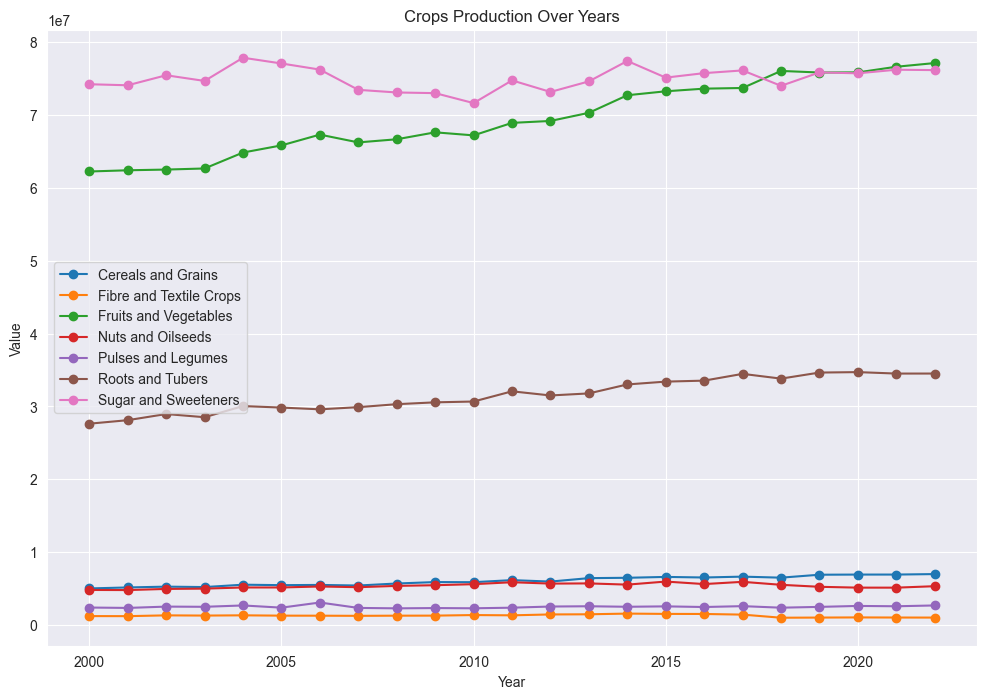

In [10]:
# Plotting
plt.figure(figsize=(12, 8))

# Loop through unique grouped items
for i, item in enumerate(grouped_data['Grouped Item'].unique(), start=1):
    # Filter data for the current item
    item_data = grouped_data[grouped_data['Grouped Item'] == item]
    # Plot line chart for the item
    plt.plot(item_data['Year'], item_data['Value'], label=item, marker='o')

plt.title('Crops Production Over Years')
plt.xlabel('Year')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

## Merging Datasets for Correlation Checks
Based on the target variable **"food trade indicators"**, I am going to correlate which dataset has the highest matching rate with my target variable so that I can use that to predict the export value and get higher precision and accuracy. I will also be discarding datasets that have negative correlation or not near to my target variable (i.e., it's not that it is not useful, negative correlation can be taken as well but I am assuming that I will only take positive instances of it to make it easier to train the model.)

In [137]:
target = food_trade_df
# food_security_df['Year'] = food_security_df['Year'].astype(int)
required_dataframes = [crops_prod_df, emissions_df, exchange_rates_df, fertilizers_use_df, fdi_df, land_temp_change_df, land_use_df, pesticides_use_df]
for df in required_dataframes:
    target = pd.merge(target, df, left_on=['Area', 'Year'], right_on=['Area', 'Year'], how='inner')
target_corr = target.drop('Area', axis=1)
required_features_corr = target_corr.corr()

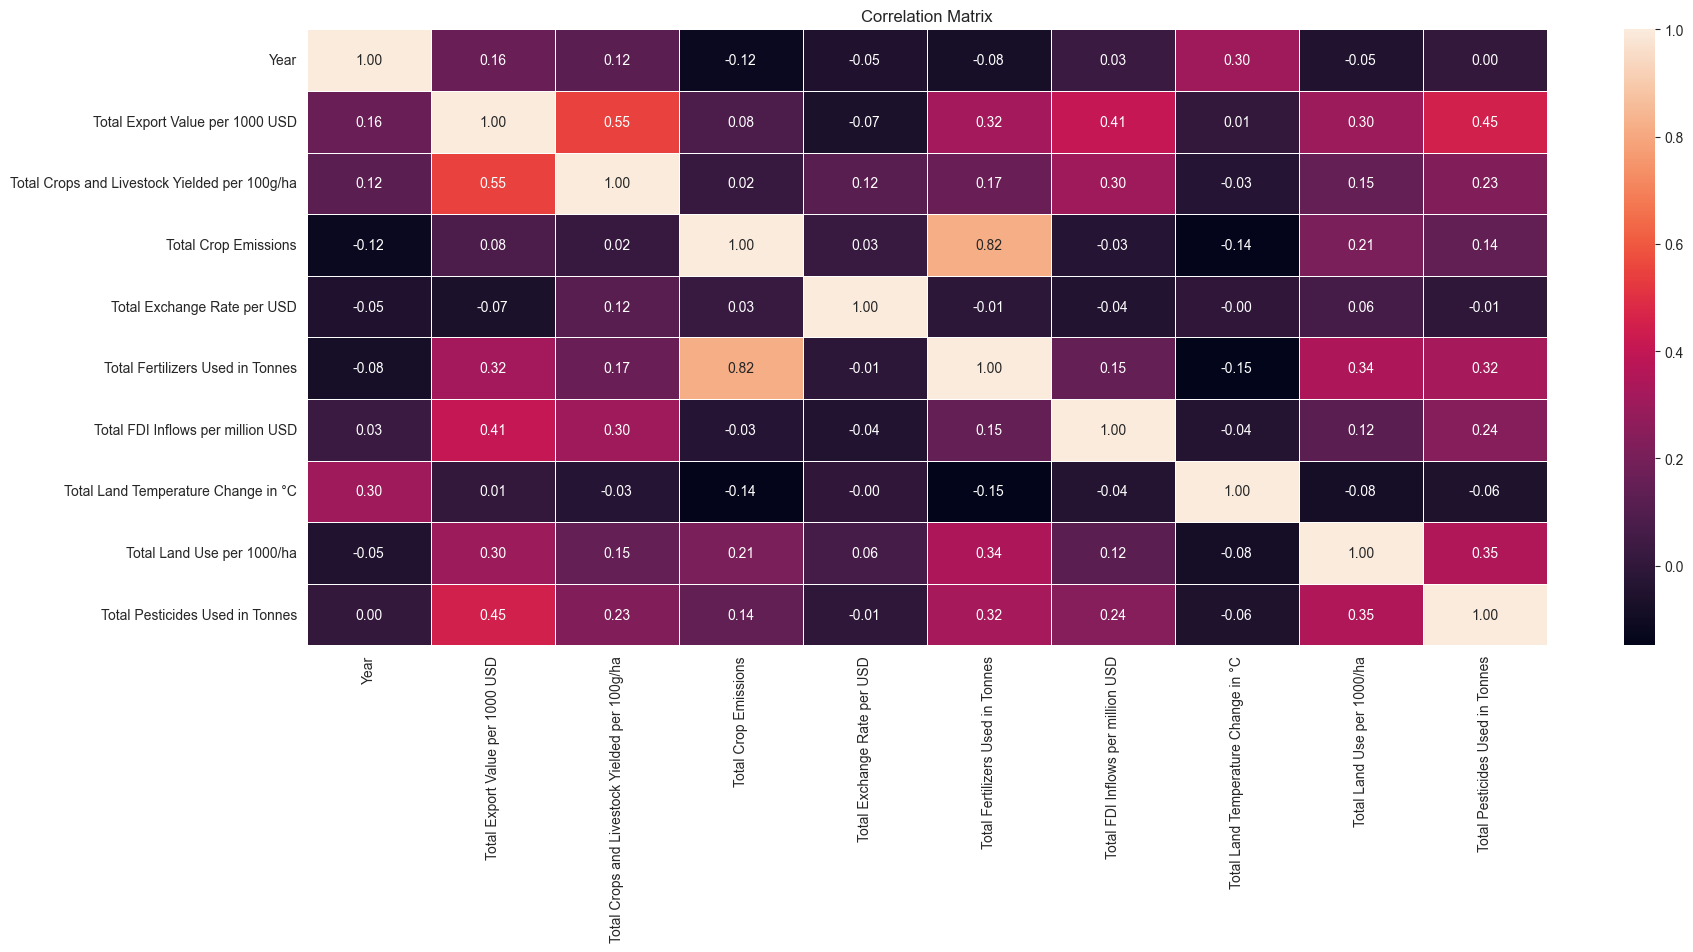

In [138]:
plt.figure(figsize=(20, 8))
sns.heatmap(required_features_corr, annot=True, fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

[Explain the correlation]

In [139]:
# Print the correlation values with the target variable
required_features_corr['Total Export Value per 1000 USD'].sort_values(ascending=False)

Total Export Value per 1000 USD                  1.000000
Total Crops and Livestock Yielded per 100g/ha    0.550755
Total Pesticides Used in Tonnes                  0.450007
Total FDI Inflows per million USD                0.407518
Total Fertilizers Used in Tonnes                 0.316697
Total Land Use per 1000/ha                       0.298996
Year                                             0.163507
Total Crop Emissions                             0.081361
Total Land Temperature Change in °C              0.007437
Total Exchange Rate per USD                     -0.065216
Name: Total Export Value per 1000 USD, dtype: float64

In [140]:
merged_df = target.drop(columns=['Total Exchange Rate per USD', 'Total Land Temperature Change in °C', 'Total Crop Emissions'])

In [141]:
merged_df.shape

(61673, 8)

In [142]:
merged_df

,Area,Year,Total Export Value per 1000 USD,Total Crops and Livestock Yielded per 100g/ha,Total Fertilizers Used in Tonnes,Total FDI Inflows per million USD,Total Land Use per 1000/ha,Total Pesticides Used in Tonnes
0,Albania,2002,29392.00,1001031,39908.666667,133.056327,2875.0,330.78
1,Albania,2002,29392.00,1001031,39908.666667,133.056327,2875.0,179.44
2,Albania,2002,29392.00,1001031,39908.666667,133.056327,2875.0,7.98
3,Albania,2002,29392.00,1001031,39908.666667,133.056327,2875.0,110.43
4,Albania,2002,29392.00,1001031,39908.666667,133.056327,2875.0,0.07
...,...,...,...,...,...,...,...,...
61668,Zimbabwe,2018,2036609.89,1099976,13372.690000,745.007943,39076.0,549.41
61669,Zimbabwe,2018,2036609.89,1099976,13372.690000,745.007943,39076.0,359.59
61670,Zimbabwe,2018,2036609.89,1099976,13372.690000,745.007943,39076.0,0.41
61671,Zimbabwe,2018,2036609.89,1099976,13372.690000,745.007943,39076.0,7.24


In [143]:
# # Define the subset of columns excluding 'year'
# subset_columns = [col for col in merged_df.columns if col != 'Year']
# merged_df = merged_df.dropna(subset=subset_columns)

#Iterate over each column and impute NaN values with mean
for col in merged_df.columns:
    if col != 'Year' and col != 'Area':  # Skip 'year' column
        merged_df[col] = merged_df[col].dropna()

# # Check if NaN values are imputed
# nan_values_after_imputation = merged_df.isna().sum()

In [144]:
merged_df.shape

(61673, 8)

In [145]:
merged_df = merged_df.groupby(["Area", "Year"]).mean().reset_index()

In [146]:
merged_df.shape

(815, 8)

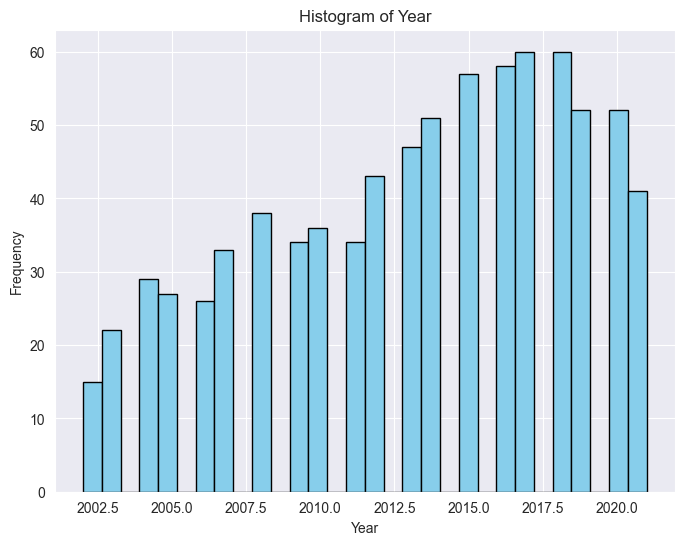

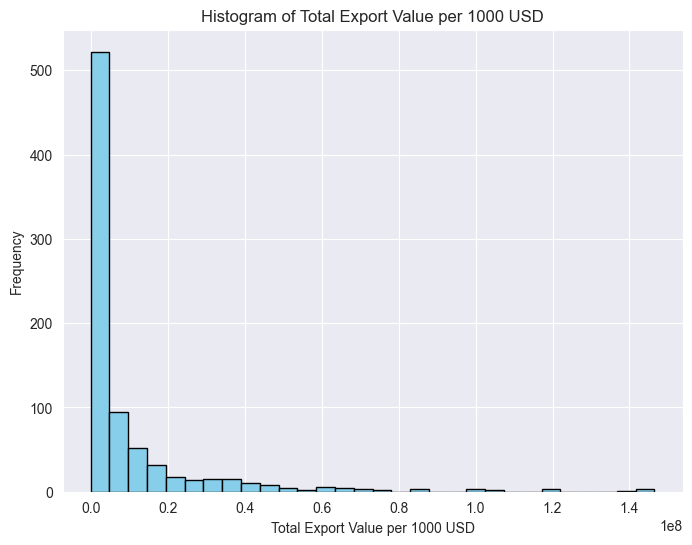

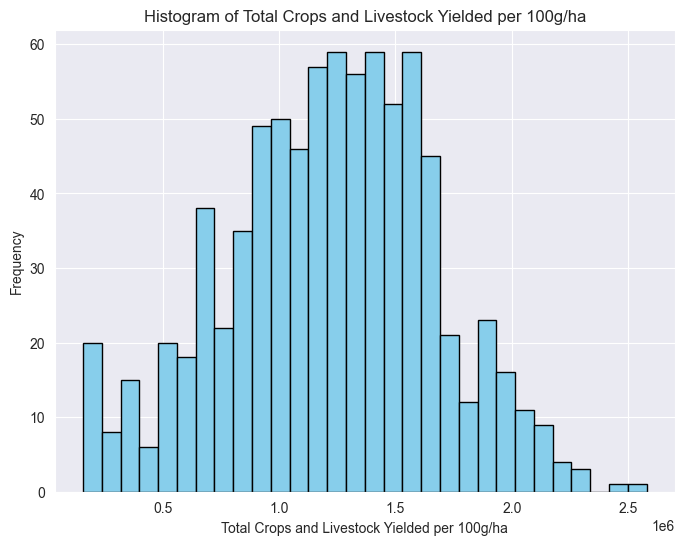

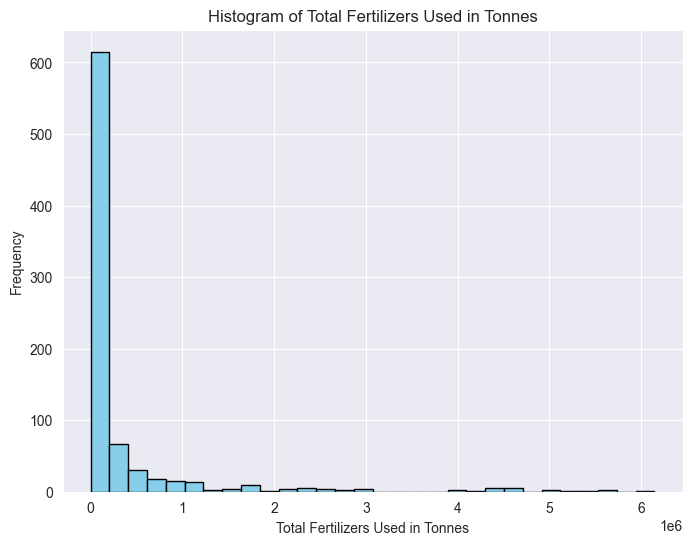

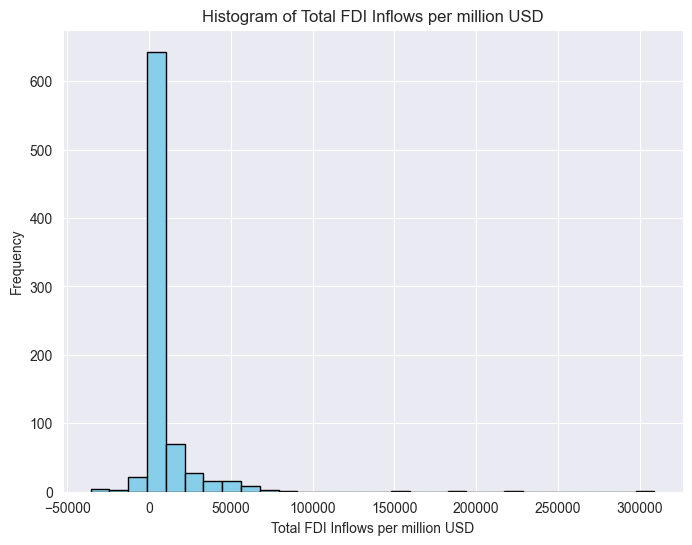

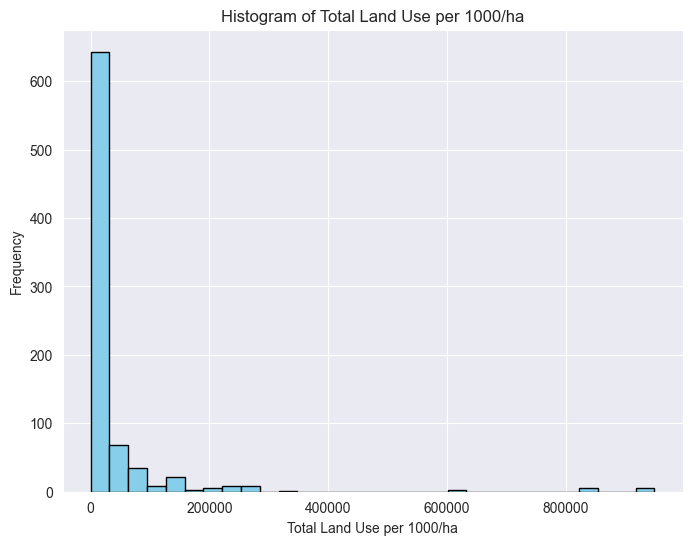

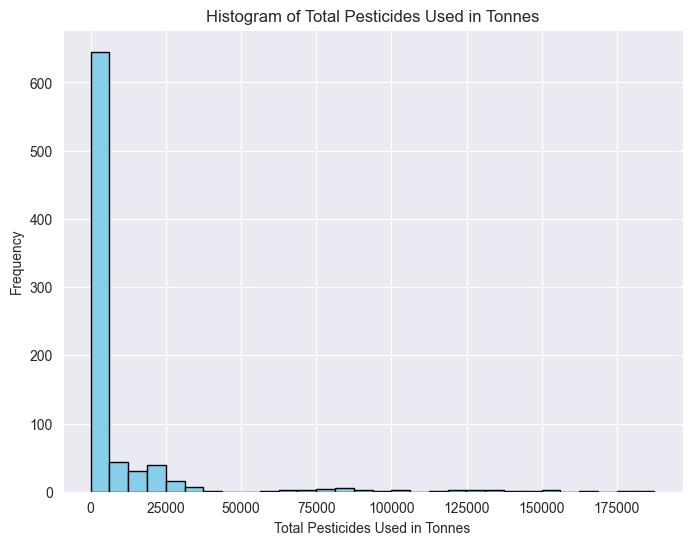

In [147]:
for column in merged_df.columns:
    if merged_df[column].dtype in ['int64', 'float64']:  # Check if the column contains numerical data
        plt.figure(figsize=(8, 6))
        plt.hist(merged_df[column], bins=30, color='skyblue', edgecolor='black')
        plt.title(f'Histogram of {column}')
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.grid(True)
        plt.show()

C:\Users\amany\MLP\lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


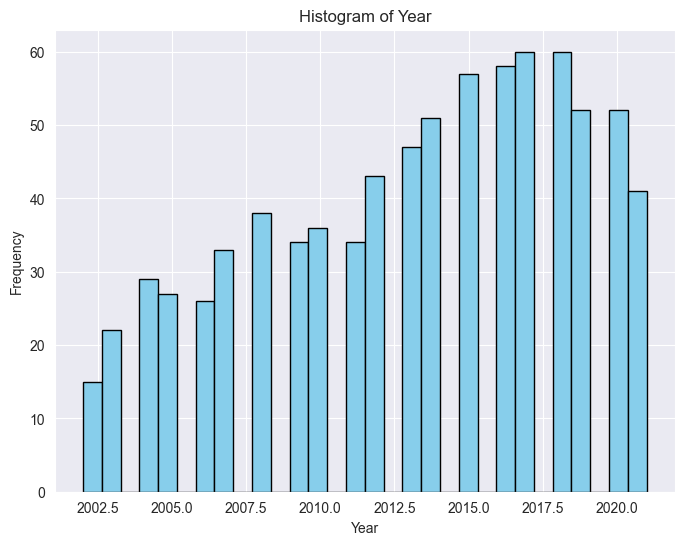

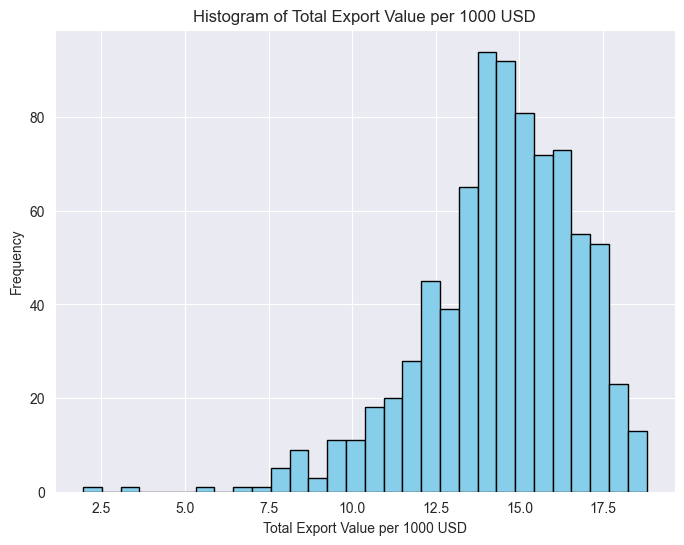

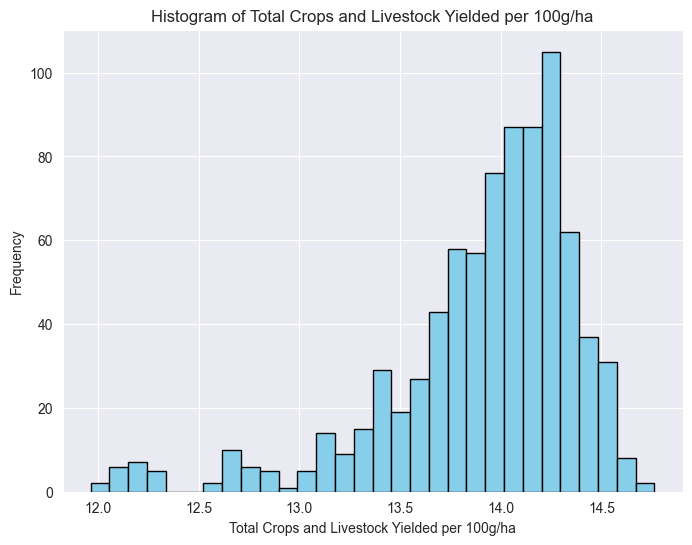

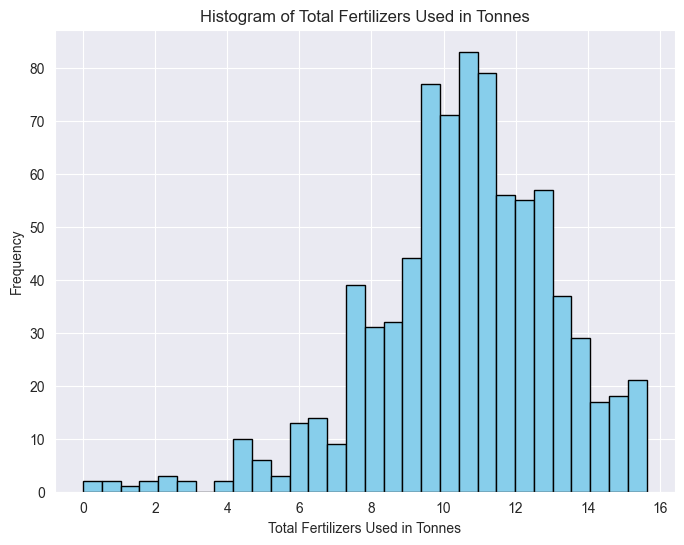

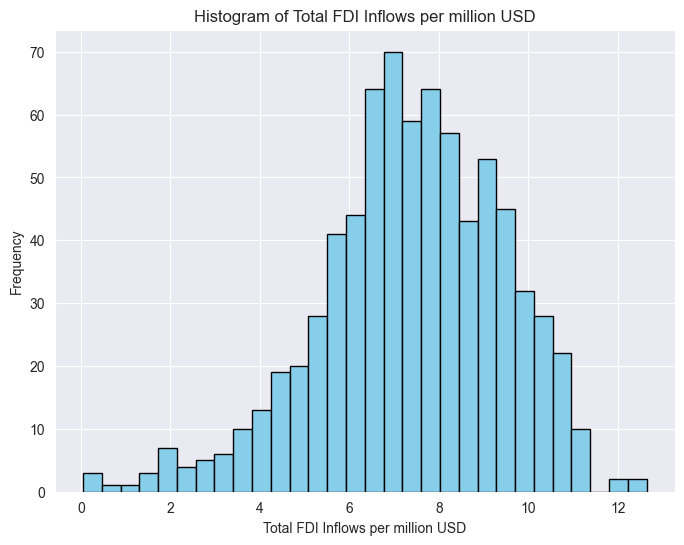

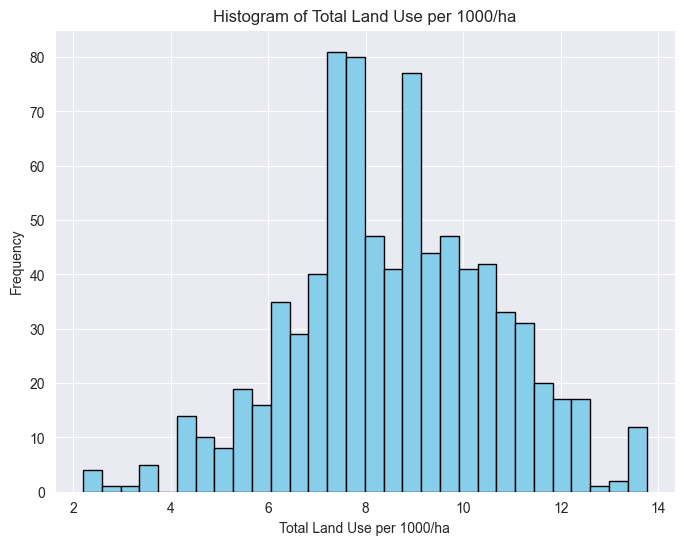

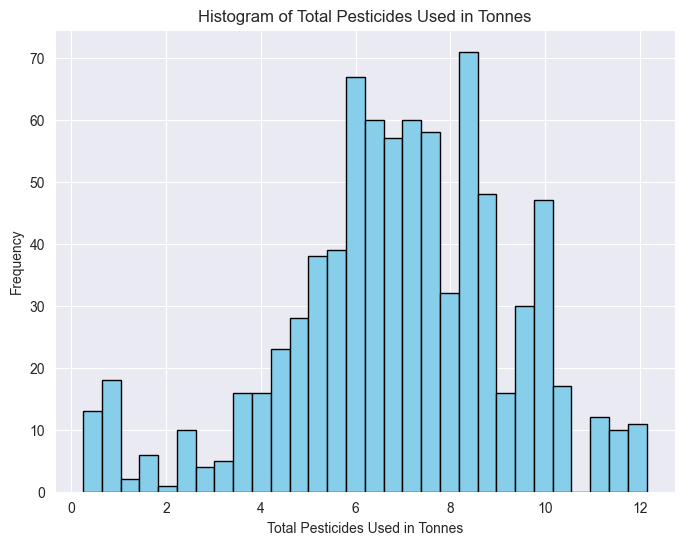

In [148]:
# Columns to log-transform
columns_to_log = ['Total FDI Inflows per million USD', 'Total Fertilizers Used in Tonnes', 'Total Pesticides Used in Tonnes', 'Total Land Use per 1000/ha', 'Total Export Value per 1000 USD', 'Total Crops and Livestock Yielded per 100g/ha']

# Log-transform specified columns
for column in columns_to_log:
    merged_df[column] = np.log1p(merged_df[column])

# Plot histograms for each column
for column in merged_df.columns:
    if merged_df[column].dtype in ['int64', 'float64']:  # Check if the column contains numerical data
        plt.figure(figsize=(8, 6))
        plt.hist(merged_df[column], bins=30, color='skyblue', edgecolor='black')
        plt.title(f'Histogram of {column}')
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.grid(True)
        plt.show()

In [149]:
merged_df.shape

(815, 8)

In [150]:
# # Select the names of numeric columns, ensuring 'Year' is excluded
# numeric_cols = merged_df.select_dtypes(include=[np.number]).columns.drop('Year')
# 
# # Apply np.log1p to all selected numeric columns, filtering out non-positive values
# merged_df.loc[:, numeric_cols] = merged_df.loc[:, numeric_cols].apply(lambda x: np.log1p(x) if (x > 0).all() else x)

In [151]:
merged_df.describe()

,Year,Total Export Value per 1000 USD,Total Crops and Livestock Yielded per 100g/ha,Total Fertilizers Used in Tonnes,Total FDI Inflows per million USD,Total Land Use per 1000/ha,Total Pesticides Used in Tonnes
count,815.000000,815.000000,815.000000,815.000000,756.000000,815.000000,815.000000
mean,2013.117791,14.434092,13.915330,10.539911,7.375711,8.593966,6.916525
std,5.297616,2.297177,0.486145,2.562735,2.057330,2.074915,2.394542
min,2002.000000,1.945910,11.963555,0.000000,0.043721,2.195000,0.243730
25%,2009.000000,13.284933,13.732137,9.293836,6.188179,7.357131,5.620428
50%,2014.000000,14.663505,14.027971,10.630499,7.468310,8.575578,7.024115
75%,2018.000000,16.069450,14.240986,12.178362,8.913640,10.094861,8.515270
max,2021.000000,18.802284,14.762958,15.631204,12.640957,13.763109,12.141117


In [152]:
# # Randomly sample 25 rows from the DataFrame
# random_sample_df = merged_df.sample(n=215, random_state=42)  # Using a fixed random_state for reproducibility
# 
# # Save the sampled DataFrame to a new file
# random_sample_df.to_csv('random_sample.csv', index=False)

# # Update the original merged_df to remove the sampled rows
# merged_df = merged_df.drop(random_sample_df.index)
# 
# # Save the updated merged_df to a new file
# merged_df.to_csv('updated_merged_df.csv', index=False)
# 
# # Reset the index of the sampled DataFrame
# random_sample_df = random_sample_df.reset_index(drop=True)
# 
# # Print the sampled DataFrame
# random_sample_df

In [153]:
merged_df.shape

(815, 8)

In [154]:
nan_counts = merged_df.isna().sum()

print(nan_counts)

Area                                              0
Year                                              0
Total Export Value per 1000 USD                   0
Total Crops and Livestock Yielded per 100g/ha     0
Total Fertilizers Used in Tonnes                  0
Total FDI Inflows per million USD                59
Total Land Use per 1000/ha                        0
Total Pesticides Used in Tonnes                   0
dtype: int64


In [155]:
merged_df = merged_df.dropna()

print('NaN Value Dropped')

nan_counts = merged_df.isna().sum()

print(nan_counts)

NaN Value Dropped
Area                                             0
Year                                             0
Total Export Value per 1000 USD                  0
Total Crops and Livestock Yielded per 100g/ha    0
Total Fertilizers Used in Tonnes                 0
Total FDI Inflows per million USD                0
Total Land Use per 1000/ha                       0
Total Pesticides Used in Tonnes                  0
dtype: int64


In [156]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 756 entries, 0 to 814
Data columns (total 8 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Area                                           756 non-null    object 
 1   Year                                           756 non-null    int64  
 2   Total Export Value per 1000 USD                756 non-null    float64
 3   Total Crops and Livestock Yielded per 100g/ha  756 non-null    float64
 4   Total Fertilizers Used in Tonnes               756 non-null    float64
 5   Total FDI Inflows per million USD              756 non-null    float64
 6   Total Land Use per 1000/ha                     756 non-null    float64
 7   Total Pesticides Used in Tonnes                756 non-null    float64
dtypes: float64(6), int64(1), object(1)
memory usage: 53.2+ KB


In [168]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
# Split the data into features and target variable sorted by year
df = merged_df.sort_values('Year')
df.Year = df.Year.astype(str)
X = df.drop(columns=['Total Export Value per 1000 USD'])
y = df['Total Export Value per 1000 USD']

# Initialize scalers and encoders
scaler = StandardScaler()
encoder = OneHotEncoder(sparse_output=False ,handle_unknown='ignore')

def preprocess_data(X, scaler, encoder, fit=False):
    # Define numeric and categorical features
    numeric_features = ['Total Fertilizers Used in Tonnes', 'Total Land Use per 1000/ha', 'Total Crops and Livestock Yielded per 100g/ha', 'Total Pesticides Used in Tonnes']
    categorical_features = ['Area', 'Year']

    # Separate features
    X_numeric = X[numeric_features]
    X_categorical = X[categorical_features]

    # Scale numeric features and encode categorical features
    if fit:
        # X_numeric_scaled = scaler.fit_transform(X_numeric)
        # When fitting, we also obtain the feature names from the encoder
        X_categorical_encoded = encoder.fit_transform(X_categorical)
        categorical_feature_names = encoder.get_feature_names_out(categorical_features)
    else:
        # X_numeric_scaled = scaler.transform(X_numeric)
        X_categorical_encoded = encoder.transform(X_categorical)
        categorical_feature_names = encoder.get_feature_names_out(categorical_features)

    # Convert numpy arrays back to DataFrame to retain column names
    X_numeric_df = pd.DataFrame(X_numeric, columns=numeric_features, index=X.index)
    X_categorical_df = pd.DataFrame(X_categorical_encoded, columns=categorical_feature_names, index=X.index)

    # Concatenate numeric and categorical DataFrames along the columns
    X_processed = pd.concat([X_numeric_df, X_categorical_df], axis=1)

    return X_processed

In [169]:
# # Preprocess features
# X_processed = preprocess_data(X, scaler, encoder, fit=True)
# 
# # Check for NaN values in the preprocessed data
# nan_counts = X_processed.isna().sum()
# 
# # Print the counts of NaN values for each column
# print(nan_counts)
# 
# # Alternatively, you can check if there are any NaN values in the entire DataFrame
# if X_processed.isna().any().any():
#     print("There are NaN values in the preprocessed data.")
# else:
#     print("There are no NaN values in the preprocessed data.")

In [170]:
# # Check if there are any NaN values in the preprocessed data
# if X_processed.isna().any().any():
#     print("NaN values are present in the preprocessed data.")
# 
#     # Drop rows with NaN values
#     X_processed = X_processed.dropna()
# 
#     print("NaN values have been dropped.")
# else:
#     print("There are no NaN values in the preprocessed data.")

In [171]:
# # Check for NaN values in the preprocessed data
# nan_counts = X_processed.isna().sum()
# 
# # Print the counts of NaN values for each column
# print(nan_counts)

In [172]:
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPRegressor
from sklearn.datasets import make_regression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=69)

In [173]:
X_train_processed = preprocess_data(X_train, scaler, encoder, fit=True)
X_test_processed = preprocess_data(X_test, scaler, encoder, fit=False)

In [174]:
X_train_processed

,Total Fertilizers Used in Tonnes,Total Land Use per 1000/ha,Total Crops and Livestock Yielded per 100g/ha,Total Pesticides Used in Tonnes,Area_Albania,Area_Argentina,Area_Armenia,Area_Australia,Area_Austria,Area_Bahrain,...,Year_2012,Year_2013,Year_2014,Year_2015,Year_2016,Year_2017,Year_2018,Year_2019,Year_2020,Year_2021
523,12.036733,9.583799,13.907771,5.782674,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
652,9.243332,7.024198,13.130343,6.789610,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
377,12.643836,11.354502,14.425630,7.401250,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
216,10.706137,7.340688,14.346550,6.560122,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
38,12.323919,12.385962,14.446655,10.357336,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
412,9.523763,7.170060,14.019484,5.588746,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
430,7.082366,8.296293,13.981905,5.720312,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
244,14.407376,7.757693,14.481132,8.421122,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
766,13.216736,10.254813,14.347962,9.588845,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [175]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('mlp', MLPRegressor(random_state=69, max_iter=1000))
])

In [176]:
parameter_space = {
    'mlp__hidden_layer_sizes': [(50,), (100,), (50, 50)],
    'mlp__activation': ['tanh', 'relu'],
    'mlp__solver': ['sgd', 'adam'],
    'mlp__alpha': [0.0001, 0.05],
    'mlp__learning_rate': ['constant','adaptive'],
    'mlp__max_iter': [1000, 800, 600]
}

In [177]:
grid_search = GridSearchCV(pipeline, parameter_space, n_jobs=-1, cv=3)
grid_search.fit(X_train_processed, y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('mlp',
                                        MLPRegressor(max_iter=1000,
                                                     random_state=69))]),
             n_jobs=-1,
             param_grid={'mlp__activation': ['tanh', 'relu'],
                         'mlp__alpha': [0.0001, 0.05],
                         'mlp__hidden_layer_sizes': [(50,), (100,), (50, 50)],
                         'mlp__learning_rate': ['constant', 'adaptive'],
                         'mlp__max_iter': [1000, 800, 600],
                         'mlp__solver': ['sgd', 'adam']})

In [178]:
print("Best parameters found:\n", grid_search.best_params_)
print("Best score achieved:", grid_search.best_score_)

Best parameters found:
 {'mlp__activation': 'tanh', 'mlp__alpha': 0.05, 'mlp__hidden_layer_sizes': (50, 50), 'mlp__learning_rate': 'adaptive', 'mlp__max_iter': 1000, 'mlp__solver': 'sgd'}
Best score achieved: 0.8667312392247196


In [179]:
import joblib
from sklearn.model_selection import TimeSeriesSplit
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error, r2_score

# Define model
model = MLPRegressor(activation='tanh', alpha=0.05, hidden_layer_sizes=(150, 150), learning_rate='adaptive', max_iter=1000, solver='sgd', random_state=69)

# TimeSeriesSplit setup
tscv = TimeSeriesSplit(n_splits=20)

# Assuming 'X' and 'y' are already defined and are appropriate DataFrame and Series
for train_index, test_index in tscv.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Preprocess data
    X_train_processed = preprocess_data(X_train, scaler, encoder, fit=True)
    X_test_processed = preprocess_data(X_test, scaler, encoder, fit=False)


    # Train the model
    model.fit(X_train_processed, y_train)

    # Make predictions
    y_pred = model.predict(X_test_processed)

    # Reverse the log transformation on predictions
    y_pred_original_scale = np.expm1(y_pred)

    # Calculate and print the mean absolute error
    mae = mean_absolute_error(np.expm1(y_test), y_pred_original_scale)
    print(f"Mean Absolute Error: {mae}")

    # Calculate and print the R2 score
    r2 = r2_score(np.expm1(y_test), y_pred_original_scale)
    print(f"R2 Score: {r2}")

    # Calculate and print the adjusted R2 score
    n_samples = X_test_processed.shape[0]
    n_predictors = X_test_processed.shape[1]
    adjusted_r2 = 1 - (1 - r2) * (n_samples - 1) / (n_samples - n_predictors - 1)
    print(f"Adjusted R2 Score: {adjusted_r2}")
    print()
    print()

    joblib.dump(model, 'model/model_new'+str(adjusted_r2)+'.pkl')


Mean Absolute Error: 2028971.749341194
R2 Score: 0.3991391180578022
Adjusted R2 Score: -2.505021811329487

Mean Absolute Error: 2991246.31237499
R2 Score: 0.3156872018525324
Adjusted R2 Score: 12.975473967580683


C:\Users\amany\MLP\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Mean Absolute Error: 2503583.408062462
R2 Score: 0.31292158717145113
Adjusted R2 Score: 3.671971605444357

Mean Absolute Error: 5632425.784556086
R2 Score: 0.060092049459192665
Adjusted R2 Score: 2.7314093825751717

Mean Absolute Error: 10631613.662100129
R2 Score: -0.11884859007359938
Adjusted R2 Score: 2.3503345052612405

Mean Absolute Error: 8809108.790791307
R2 Score: 0.32567638286573497
Adjusted R2 Score: 1.674323617134265


C:\Users\amany\MLP\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Mean Absolute Error: 7728524.973698674
R2 Score: 0.6989977469169621
Adjusted R2 Score: 1.2508352109025316


C:\Users\amany\MLP\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Mean Absolute Error: 7372248.039485096
R2 Score: 0.5019620932708144
Adjusted R2 Score: 1.387362816344922


C:\Users\amany\MLP\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Mean Absolute Error: 6328995.552522175
R2 Score: 0.6274983462788323
Adjusted R2 Score: 1.2459916581177524


C:\Users\amany\MLP\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Mean Absolute Error: 4521641.341585295
R2 Score: 0.8998958791460847
Adjusted R2 Score: 1.0604076591359834


C:\Users\amany\MLP\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Mean Absolute Error: 3607390.0314957886
R2 Score: 0.7054593409350671
Adjusted R2 Score: 1.1689987388077483

Mean Absolute Error: 3768750.1351073566
R2 Score: 0.769343008848071
Adjusted R2 Score: 1.1281427728621827


C:\Users\amany\MLP\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Mean Absolute Error: 3478697.7355644144
R2 Score: 0.7640699577422833
Adjusted R2 Score: 1.1214345805738248

Mean Absolute Error: 4325484.147197947
R2 Score: 0.7778246071656592
Adjusted R2 Score: 1.109523080974675


C:\Users\amany\MLP\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Mean Absolute Error: 5477933.9196925415
R2 Score: 0.2968637679770657
Adjusted R2 Score: 1.3281302416107028


C:\Users\amany\MLP\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Mean Absolute Error: 5241732.374380505
R2 Score: 0.33049515000938534
Adjusted R2 Score: 1.2929083718708938

Mean Absolute Error: 3248935.1711918465
R2 Score: 0.8059486907149831
Adjusted R2 Score: 1.0838493311725381

Mean Absolute Error: 5698643.340439275
R2 Score: 0.563411977504866
Adjusted R2 Score: 1.1841033829798757

Mean Absolute Error: 3757416.4808957344
R2 Score: 0.5935638613325771
Adjusted R2 Score: 1.1673560570983506

Mean Absolute Error: 6531585.387244881
R2 Score: 0.33153293095700687
Adjusted R2 Score: 1.2658675842784632


In [166]:
X_train_processed.shape

(720, 124)

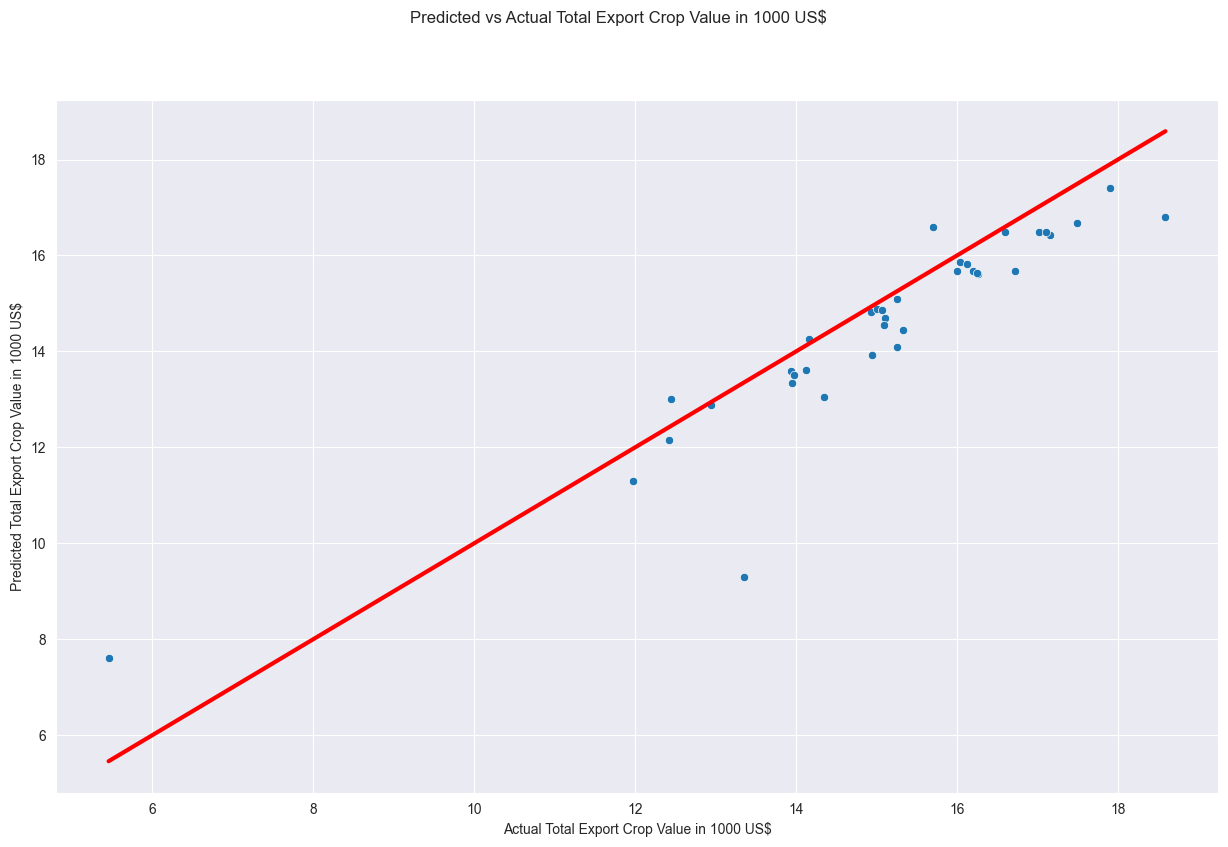

In [167]:
# Plotting the results as a scatter plot
fig, ax = plt.subplots(figsize=(15,9))
plt.suptitle("Predicted vs Actual Total Export Crop Value in 1000 US$")
sns.scatterplot(x=y_test, y=y_pred, ax=ax)
# Add a line for predicted values
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=3)
plt.xlabel("Actual Total Export Crop Value in 1000 US$")
plt.ylabel("Predicted Total Export Crop Value in 1000 US$")
plt.show()

In [1122]:
print(df.isna().sum())

Area                                             0
Year                                             0
Total Export Value per 1000 USD                  0
Total Crops and Livestock Yielded per 100g/ha    0
Total Crop Emissions                             0
Total Fertilizers Used in Tonnes                 0
Total FDI Inflows per million USD                0
Total Land Use per 1000/ha                       0
Total Pesticides Used in Tonnes                  0
dtype: int64


In [335]:
# Get the training score
training_score = model.score(X_train_processed, y_train)
print(f'Training Score: {training_score}')

# Get the testing score
testing_score = model.score(X_test_processed, y_test)
print(f'Testing Score: {testing_score}')

# Check for overfitting
if training_score - testing_score > 0.1:
    print('The model is overfitting')
else:
    print('The model is not overfitting')

Training Score: 0.9800941509859974
Testing Score: 0.958552037669334
The model is not overfitting


In [335]:
# # Assuming 'streamed_data' is your merged dataset stored in a Pandas DataFrame
# 
# # Select only the numeric columns
# numeric_columns = streamed_data.select_dtypes(include=['float64', 'int64']).columns
# 
# # Initialize the StandardScaler
# scaler = StandardScaler()
# 
# # Fit the StandardScaler to your numeric data
# scaler.fit(streamed_data[numeric_columns])
# 
# # Transform your numeric data using the fitted StandardScaler
# streamed_data.loc[:, numeric_columns] = scaler.transform(streamed_data.loc[:, numeric_columns])
# 
# # The non-numeric columns remain unchanged

## Random Sample Prediction

In [344]:
random_sample_df = pd.read_csv("random_sample.csv", low_memory=False)

In [345]:
random_sample_df

,Area,Year,Total Export Value per 1000 USD,Total Crops and Livestock Yielded per 100g/ha,Total Fertilizers Used in Tonnes,Total FDI Inflows per million USD,Total Land Use per 1000/ha,Total Pesticides Used in Tonnes
0,Slovakia,2015,12.644295,11.562235,10.191803,3.626138,7.199694,5.794797
1,Guyana,2003,9.334422,11.757059,8.202243,3.299534,8.159316,6.438447
2,Bangladesh,2015,13.031544,11.424240,13.954621,6.411309,8.757999,8.114426
3,Czechia,2008,13.321934,11.721753,10.485232,7.536465,7.796521,7.143803
4,French Polynesia,2011,9.781983,12.109124,5.051021,4.382182,4.285539,4.626491
...,...,...,...,...,...,...,...,...
312,Dominican Republic,2018,12.507429,11.501923,9.622945,7.224935,7.265023,7.329071
313,Latvia,2019,12.496408,11.679384,10.578691,5.343398,7.477876,6.050814
314,Jamaica,2008,10.835370,11.643204,7.460251,6.629627,5.786386,5.910266
315,Namibia,2011,10.096534,10.672971,7.344461,6.031983,10.067638,5.076200


In [346]:
random_sample_df = random_sample_df.dropna()

print('NaN Value Dropped')

nan_counts = random_sample_df.isna().sum()

print(nan_counts)

NaN Value Dropped
Area                                             0
Year                                             0
Total Export Value per 1000 USD                  0
Total Crops and Livestock Yielded per 100g/ha    0
Total Fertilizers Used in Tonnes                 0
Total FDI Inflows per million USD                0
Total Land Use per 1000/ha                       0
Total Pesticides Used in Tonnes                  0
dtype: int64


In [360]:
# 1. Prepare Features for 2027
X_2027 = pd.DataFrame({
    'Total Crops and Livestock Yielded per 100g/ha': [18.436446],
    'Total Fertilizers Used in Tonnes': [12.348562],
    'Total FDI Inflows per million USD': [5.780995],
    'Total Land Use per 1000/ha': [14.160528],
    'Total Pesticides Used in Tonnes': [7.772765],
    'Area': ['Nepal'],
    'Year': [2012]# Provide a specific area for prediction
})

# 2. Preprocess Features
X_2027_processed = preprocess_data(X_2027, scaler, encoder, fit=False)

# 3. Make Predictions
y_2027_pred = model.predict(X_2027_processed)
print("Predicted food_trade_indicators for 2027:", y_2027_pred)

TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [352]:
import pickle
from sklearn.preprocessing import StandardScaler, OneHotEncoder
# Step 1: Load the Trained Model
with open('model/model_new1.033542479246782.pkl', 'rb') as file:
    model = pickle.load(file)
print(type(model))
print(model)

<class 'numpy.ndarray'>
['Total Fertilizers Used in Tonnes' 'Total FDI Inflows per million USD'
 'Total Land Use per 1000/ha'
 'Total Crops and Livestock Yielded per 100g/ha'
 'Total Pesticides Used in Tonnes' 'Area_Albania' 'Area_Argentina'
 'Area_Armenia' 'Area_Australia' 'Area_Austria' 'Area_Bahrain'
 'Area_Bangladesh' 'Area_Bhutan' 'Area_Bolivia (Plurinational State of)'
 'Area_Bosnia and Herzegovina' 'Area_Botswana' 'Area_Brazil'
 'Area_Brunei Darussalam' 'Area_Burkina Faso' 'Area_Burundi'
 'Area_Cameroon' 'Area_Canada' 'Area_Chile'
 'Area_China, Taiwan Province of' 'Area_Colombia' 'Area_Croatia'
 'Area_Cyprus' 'Area_Czechia' "Area_Côte d'Ivoire" 'Area_Denmark'
 'Area_Dominican Republic' 'Area_Ecuador' 'Area_Egypt' 'Area_El Salvador'
 'Area_Ethiopia' 'Area_France' 'Area_French Polynesia' 'Area_Gambia'
 'Area_Georgia' 'Area_Ghana' 'Area_Guinea' 'Area_Hungary' 'Area_Iceland'
 'Area_India' 'Area_Indonesia' 'Area_Iran (Islamic Republic of)'
 'Area_Ireland' 'Area_Italy' 'Area_Jamaica' 

In [354]:
# Step 2: Preprocess the Data
rand_df = random_sample_df.sort_values('Year')
rand_df.Year = rand_df.Year.astype(str)
rand_X = rand_df.drop(columns=['Total Export Value per 1000 USD'])
rand_y = rand_df['Total Export Value per 1000 USD']

# Preprocess the data
def rand_preprocess_data(rand_X, scaler, encoder, fit=True):
    # Define numeric and categorical features
    numeric_features = ['Total Fertilizers Used in Tonnes', 'Total FDI Inflows per million USD', 'Total Land Use per 1000/ha', 'Total Crops and Livestock Yielded per 100g/ha', 'Total Pesticides Used in Tonnes']
    categorical_features = ['Area', 'Year']

    # Separate features
    X_numeric = rand_X[numeric_features]
    X_categorical = rand_X[categorical_features]

    # Scale numeric features and encode categorical features
    if fit:
        X_numeric_scaled = scaler.fit_transform(X_numeric)
        # When fitting, we also obtain the feature names from the encoder
        X_categorical_encoded = encoder.fit_transform(X_categorical)
        categorical_feature_names = encoder.get_feature_names_out(categorical_features)
    else:
        X_numeric_scaled = scaler.transform(X_numeric)
        X_categorical_encoded = encoder.transform(X_categorical)
        categorical_feature_names = encoder.get_feature_names_out(categorical_features)

    # Convert numpy arrays back to DataFrame to retain column names
    X_numeric_df = pd.DataFrame(X_numeric_scaled, columns=numeric_features, index=rand_X.index)
    X_categorical_df = pd.DataFrame(X_categorical_encoded, columns=categorical_feature_names, index=rand_X.index)

    # Concatenate numeric and categorical DataFrames along the columns
    rand_X_processed = pd.concat([X_numeric_df, X_categorical_df], axis=1)

    return rand_X_processed


rand_X_processed = rand_preprocess_data(rand_X, scaler, encoder)

# Step 3: Make Predictions
predictions = model.predict(rand_X_processed)

# Step 4: Visualize or Export Predictions
years = [2025, 2026, 2027]
predicted_values = pd.DataFrame({'Year': years, 'Predicted Export Value': predictions})
print(predicted_values)

# Optionally, export predictions to a CSV file
predicted_values.to_csv('predicted_export_values.csv', index=False)

AttributeError: 'numpy.ndarray' object has no attribute 'predict'